# Comparative Studies of Conventional and Machine Learning Models in Online Retail Arbitrage
# Haiyang Bao (Supervised by Yossiri AdulyasaK)

# (Appendix: Code)

## Preprocessing Raw Dataset

In [3]:
product = pd.read_csv('Game_Dataset/product.csv', usecols=[0, 2, 3, 6])
product_info = pd.read_csv('Game_Dataset/product_info.csv')
product_answer = pd.read_csv('Game_Dataset/product_answer.csv', usecols=[0, 1, 3, 5, 6, 7, 8, 9])
product_review = pd.read_csv('Game_Dataset/product_review.csv', usecols=[0, 1, 4, 5])
product_question = pd.read_csv('Game_Dataset/product_question.csv', usecols=[0, 1])

In [4]:
# Overview of all dataset

product.head(2)
product_info.head(2)
product_answer.head(2)
product_question.head(2)
product_review.head(2)

,asin,platform,publisher,forum_id
0,B000B6ML28,Xbox 360,Microsoft,Fx336SNJI9F853E
1,B000BLNFPA,Xbox 360,Nordic Games,Fx1YGKPJ21390TV


,asin,date,list_price,lowest_newprice,lowest_usedprice,total_new,total_used,tradein_value,sales_rank
0,B000B6ML28,2015-02-08,19.99,7.99,0.01,17,183,NaN,8410.0
1,B000B6ML28,2015-02-09,19.99,7.99,0.01,17,182,NaN,6509.0


,answer_id,question_id,answer_date,is_seller,sentiment,polarity,subjectivity,topic
0,MxO33ZP193HK3L,Tx10067MCIUQIOE,2014-08-23,0,-0.35,0.25,1.00,0
1,Mx3HJZB6UA2D8P8,Tx10067MCIUQIOE,2014-08-23,0,0.00,-0.06,0.43,3


,question_id,forum_id
0,Tx3IJU7N5TWKU7A,Fx336SNJI9F853E
1,TxCICHWHUQCFFI,Fx336SNJI9F853E


,review_id,asin,star,review_date
0,R2HN4UIRUTOT75,B000B6ML28,5,2005-11-16
1,RFAH5G06QEDKQ,B000B6ML28,5,2005-11-20


In [422]:
product.shape
print()
product_info.groupby('asin').count().describe()
print()
product_review.groupby('asin').count().describe()

(1945, 4)

,date,list_price,lowest_newprice,lowest_usedprice,total_new,total_used,tradein_value,sales_rank
count,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,190.492285,190.464410,182.872076,182.996018,190.492285,190.492285,167.769537,190.247387
std,68.651366,68.721621,72.451853,74.738088,68.651366,68.651366,84.109894,69.009101
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,184.000000,184.000000,156.000000,161.000000,184.000000,184.000000,110.000000,184.000000
50%,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
75%,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
max,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000


,review_id,star,review_date
count,1917.000000,1917.000000,1917.000000
mean,139.193010,139.193010,139.193010
std,181.290348,181.290348,181.290348
min,1.000000,1.000000,1.000000
25%,22.000000,22.000000,22.000000
50%,64.000000,64.000000,64.000000
75%,179.000000,179.000000,179.000000
max,986.000000,986.000000,986.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff70bf01dd8>]],
      dtype=object)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'STAR')

Text(0, 0.5, 'Number of Entities')

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text yticklabel objects>)

Text(0.5, 0, 'Number of Observations')

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text xticklabel objects>)

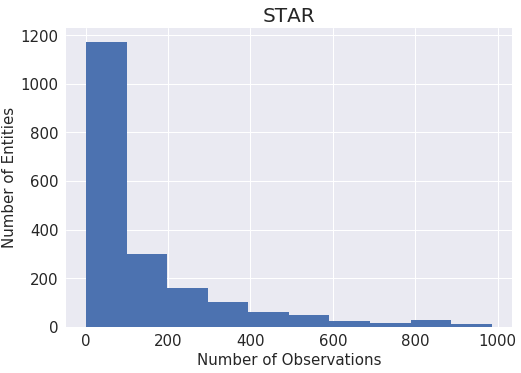

In [20]:
with plt.style.context('seaborn'):
    with plt.rc_context({
#         'figure.figsize': (20,12), 
        'legend.fontsize': 'xx-large', 
        }):
        product_review.groupby('asin').count().hist('star')
        plt.legend()
        plt.title('STAR', size=20)
        plt.ylabel('Number of Entities', size=15)
        plt.yticks(size=15)
        plt.xlabel('Number of Observations', size=15)
        plt.xticks(size=15)
        plt.savefig('star.png', bbox_inches='tight')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff70bd2e7f0>]],
      dtype=object)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Newprice')

Text(0, 0.5, 'Number of Entities')

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text yticklabel objects>)

Text(0.5, 0, 'Number of Observations')

(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 <a list of 7 Text xticklabel objects>)

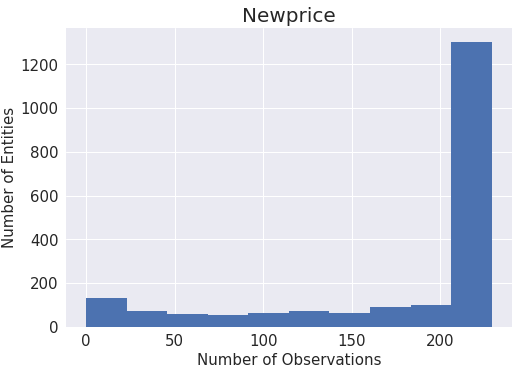

In [22]:
# Count rows of each product (asin)

with plt.style.context('seaborn'):
    with plt.rc_context({
#         'figure.figsize': (20,12), 
        'legend.fontsize': 'xx-large', 
        }):
        product_info.groupby(['asin']).count().hist('lowest_newprice')
        plt.legend()
        plt.title('Newprice', size=20)
        plt.ylabel('Number of Entities', size=15)
        plt.yticks(size=15)
        plt.xlabel('Number of Observations', size=15)
        plt.xticks(size=15)
        plt.savefig('star.png', bbox_inches='tight')

Text(0.5, 0.98, 'Frequency of Obervations')

(array([ 132.,   74.,   58.,   56.,   63.,   74.,   62.,   89.,   99.,
        1302.]),
 array([  0. ,  22.9,  45.8,  68.7,  91.6, 114.5, 137.4, 160.3, 183.2,
        206.1, 229. ]),
 <a list of 10 Patch objects>)

[Text(0, 0.5, 'Number of Entities'),
 Text(0.5, 0, 'Number of Observations'),
 Text(0.5, 1.0, 'newprice')]

No handles with labels found to put in legend.


(array([1172.,  299.,  159.,  104.,   61.,   47.,   25.,   14.,   26.,
          10.]),
 array([  1. ,  99.5, 198. , 296.5, 395. , 493.5, 592. , 690.5, 789. ,
        887.5, 986. ]),
 <a list of 10 Patch objects>)

[Text(0, 0.5, 'Number of Entities'),
 Text(0.5, 0, 'Number of Observations'),
 Text(0.5, 1.0, 'star')]

No handles with labels found to put in legend.


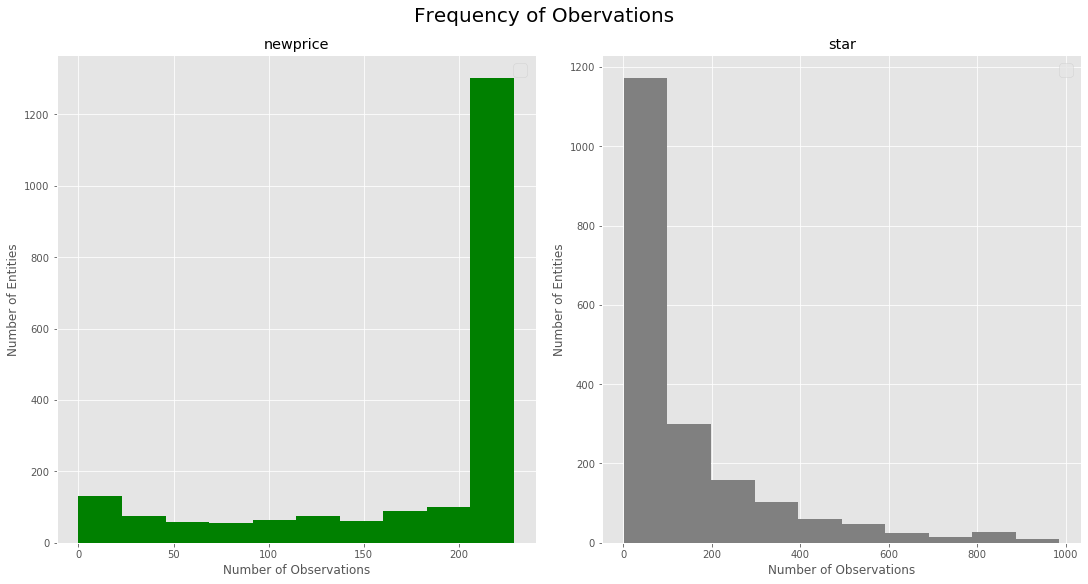

In [43]:
with plt.style.context('ggplot'):
    with plt.rc_context({
        'figure.figsize': (15,8), 
        'legend.fontsize': 'xx-large', 
#          'xtick.color': 'white',
        }):
        
        fig = plt.figure(constrained_layout=True)
        spec = fig.add_gridspec(ncols=2, nrows=1)
        fig.suptitle('Frequency of Obervations', size=20)
        
        ax0 = fig.add_subplot(spec[0, 0])
        ax0.hist(product_info.groupby(['asin']).count()['lowest_newprice'], color='green')
        ax0.set(title='newprice',
              xlabel='Number of Observations',
              ylabel='Number of Entities')
        ax0.legend()
        
        ax1 = fig.add_subplot(spec[0, 1])
        ax1.hist(product_review.groupby(['asin']).count()['star'], color='grey')
        ax1.set(title='star',
              xlabel='Number of Observations',
              ylabel='Number of Entities')
        ax1.legend()
        plt.savefig('grid.png', bbox_inches='tight')


### Make Dataframe for All Items with Price observation == 229

In [423]:
pd.set_option('display.max_rows', 20)

In [44]:
# Count rows of each product (asin)

asin_sorted = product_info.groupby(['asin']).count().sort_values('date')

In [45]:
asin_sorted[::-1]

,date,list_price,lowest_newprice,lowest_usedprice,total_new,total_used,tradein_value,sales_rank
asin,,,,,,,,
B000B6ML28,229,229,229,229,229,229,0,229
B00CSLIYXY,229,229,229,229,229,229,229,229
B00CS9NJC2,229,229,229,229,229,229,229,229
B00CS9NJGI,229,229,229,229,229,229,179,229
B00CS9NJS6,229,229,229,4,229,229,178,229
B00CS9NJUY,229,229,229,229,229,229,229,229
B00CSLIYTI,229,229,229,229,229,229,229,229
B00CSLIYU2,229,229,229,229,229,229,229,229
B00CSLJ1L8,229,229,229,229,229,229,229,229


In [46]:
# Collect ASIN having 229 temporal data points

asin_selected_list = []

for idx, *val in asin_sorted.itertuples():
    if val[0] == 229:
        asin_selected_list.append(idx)
        
len(asin_selected_list)

890

In [47]:
product_info.set_index('asin', inplace=True)
product.set_index('asin', inplace=True)
product_review.set_index('asin', inplace=True)

In [10]:
# if not set asin as index
################################################

def make_df(asin_selected):
    single_df = product_info.loc[asin_selected].copy()
    single_df.set_index('date', inplace=True)
    
    try:
        single_forum = product.loc[asin_selected].copy()
        single_question = product_question[product_question.forum_id == single_forum.forum_id].copy()
        single_answer = product_answer.set_index('question_id').join(single_question.set_index('question_id'), how='right').copy()
        single_answer.answer_date = pd.to_datetime(single_answer.answer_date).copy()
        single_answer.set_index('answer_date', inplace=True)
        single_answer.drop(columns=['answer_id', 'forum_id'], inplace=True)
        single_df = single_df.join(single_answer, how='outer').copy()
    except Exception:
        pass

    try: 
        single_review = product_review.loc[asin_selected].copy()
        single_review.review_date = pd.to_datetime(single_review.review_date)
        single_review.set_index('review_date', inplace=True)

        single_df = single_df.join(single_review, how='left').copy()
        single_df.drop(columns='review_id', inplace=True)
    except Exception:
        pass

    return single_df

In [11]:
from tqdm import tqdm_notebook

In [12]:
from joblib import parallel_backend, Parallel, delayed

In [13]:
with parallel_backend(backend='multiprocessing'):
    final_df_list = Parallel()(delayed(make_df)(i) for i in tqdm_notebook(asin_selected_list))

In [429]:
final_df_list[0].head()
print()
len(final_df_list)

,list_price,lowest_newprice,lowest_usedprice,total_new,total_used,tradein_value,sales_rank,is_seller,sentiment,polarity,subjectivity,topic,star
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.0,NaN
2014-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.16,0.2,0.7,1.0,NaN
2015-02-08,59.99,10.97,4.83,22.0,103.0,1.30,4570.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-09,59.99,10.97,8.00,22.0,102.0,1.42,2520.0,NaN,NaN,NaN,NaN,NaN,NaN


890

**FILTER: REVIEW COUNT > 1**

In [48]:
import pickle

with open('final_df_list.pkl', 'rb') as file:
    final_df_list = pickle.load(file)

len(final_df_list)

final_df_list[0].describe()

890

,list_price,lowest_newprice,lowest_usedprice,total_new,total_used,tradein_value,sales_rank,is_seller,sentiment,polarity,subjectivity,topic,star
count,229.00,229.000000,229.00,229.000000,229.000000,0.0,229.000000,4.0,4.00000,4.0000,4.0000,4.00,10.000000
mean,19.99,8.956288,0.01,15.196507,172.279476,NaN,9544.877729,0.0,0.36750,0.0475,0.1425,0.75,4.200000
std,0.00,2.312703,0.00,1.861613,11.488383,NaN,3494.319647,0.0,0.50222,0.0950,0.2850,0.50,1.135292
min,19.99,0.750000,0.01,10.000000,150.000000,NaN,1874.000000,0.0,-0.13000,0.0000,0.0000,0.00,2.000000
25%,19.99,8.250000,0.01,14.000000,160.000000,NaN,6674.000000,0.0,-0.03250,0.0000,0.0000,0.75,3.250000
50%,19.99,9.990000,0.01,15.000000,176.000000,NaN,8974.000000,0.0,0.40000,0.0000,0.0000,1.00,5.000000
75%,19.99,10.760000,0.01,16.000000,181.000000,NaN,12129.000000,0.0,0.80000,0.0475,0.1425,1.00,5.000000
max,19.99,10.990000,0.01,20.000000,190.000000,NaN,19390.000000,0.0,0.80000,0.1900,0.5700,1.00,5.000000


In [49]:
import tqdm

In [56]:
filter_list = []
for idx, df in tqdm.tqdm_notebook(enumerate(final_df_list)):
    try:
        if df.loc[:, 'sentiment'].count() > 1:
            filter_list.append(df)
    except Exception:
        print('BAD ===>', idx)
print(len(filter_list))

BAD ===> 33
BAD ===> 172
BAD ===> 268
BAD ===> 327
BAD ===> 398
BAD ===> 545
BAD ===> 677
BAD ===> 699
BAD ===> 736
BAD ===> 782
BAD ===> 790
BAD ===> 850
BAD ===> 885

601


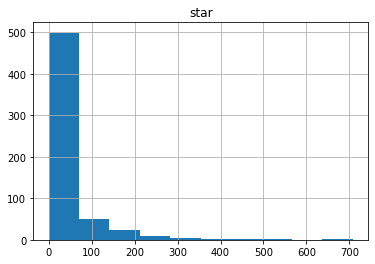

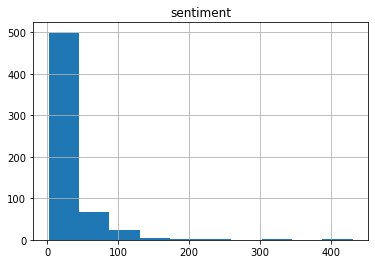

In [57]:
pd.concat([x.count().to_frame().transpose() for x in filter_list], sort=False).hist('star')
pd.concat([x.count().to_frame().transpose() for x in filter_list], sort=False).hist('sentiment');

> **Not many review count relative to Numerical Data**

**FILTER: REVIEW DATA > 100**

In [58]:
sentiment_list = []
for idx, df in tqdm.tqdm_notebook(enumerate(filter_list)):
    sentiment_list.append((idx, df.loc[:, 'sentiment'].count()))

In [63]:
sentiment_list_sorted = [tup[0] for tup in sorted(sentiment_list, key=lambda x: x[1], reverse=True)]

In [108]:
target_df_idx = [tup[0] for tup in sorted(sentiment_list, key=lambda x: x[1], reverse=True)[:50]]

In [109]:
target_df = []
for i in target_df_idx:
    target_df.append(filter_list[i])

In [110]:
len(target_df)

50

In [112]:
target_df[-1].describe()

,list_price,lowest_newprice,lowest_usedprice,total_new,total_used,tradein_value,sales_rank,is_seller,sentiment,polarity,subjectivity,topic,star
count,2.640000e+02,4.00000,264.000000,264.000000,264.000000,264.000000,264.000000,74.000000,74.000000,74.000000,74.000000,74.000000,172.000000
mean,1.999000e+01,11.49000,8.537538,91.814394,79.204545,1.930758,410.772727,0.081081,0.075541,-0.066216,0.335946,1.824324,4.500000
std,3.559461e-15,0.57735,2.139032,7.362918,6.110190,0.940411,111.913301,0.274823,0.269236,0.165411,0.268221,0.911992,0.901591
min,1.999000e+01,10.99000,1.990000,78.000000,66.000000,1.060000,200.000000,0.000000,-0.580000,-0.550000,0.000000,0.000000,1.000000
25%,1.999000e+01,10.99000,7.355000,86.000000,75.750000,1.130000,325.000000,0.000000,-0.050000,-0.160000,0.000000,1.000000,4.000000
50%,1.999000e+01,11.49000,8.950000,90.000000,79.000000,1.530000,401.500000,0.000000,0.000000,-0.005000,0.335000,2.000000,5.000000
75%,1.999000e+01,11.99000,10.000000,98.000000,83.000000,2.370000,486.500000,0.000000,0.137500,0.000000,0.540000,3.000000,5.000000
max,1.999000e+01,11.99000,12.970000,107.000000,94.000000,4.710000,698.000000,1.000000,0.800000,0.300000,1.000000,3.000000,5.000000


In [113]:
target_df_dropna = []
for i in target_df:
    target_df_dropna.append(i.dropna(how='all'))
len(target_df_dropna)

target_df_dropna[0].head()

50

,list_price,lowest_newprice,lowest_usedprice,total_new,total_used,tradein_value,sales_rank,is_seller,sentiment,polarity,subjectivity,topic,star
2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.21,-0.15,0.27,3.0,5.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.21,-0.15,0.27,3.0,5.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.21,-0.15,0.27,3.0,5.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.21,-0.15,0.27,3.0,4.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.21,-0.15,0.27,3.0,5.0


In [123]:
df_filtered = []
for df in target_df_dropna:
    df = df.drop(columns=['list_price', 'is_seller', 'tradein_value', 'topic'])
    df.rename(columns={'lowest_newprice': 'newprice', 'lowest_usedprice': 'usedprice', 
                      'total_new': 'newstock', 'total_used': 'usedstock'}, inplace=True)
    df_filtered.append(df)

In [124]:
df_filtered[0].head()
len(df_filtered)

,newprice,usedprice,newstock,usedstock,sales_rank,sentiment,polarity,subjectivity,star
2015-01-30,NaN,NaN,NaN,NaN,NaN,-0.21,-0.15,0.27,5.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,-0.21,-0.15,0.27,5.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,-0.21,-0.15,0.27,5.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,-0.21,-0.15,0.27,4.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,-0.21,-0.15,0.27,5.0


50

In [125]:
# import pickle

with open('df_filtered.pkl', 'wb') as file:
    pickle.dump(df_filtered, file)

In [127]:
star_list = []
for idx, star in tqdm.tqdm_notebook(enumerate(filter_list)):
    try:
        star_list.append((idx, star.loc[:, 'star'].count()))
    except:
        pass

star_list_sorted = [tup[0] for tup in sorted(star_list, key=lambda x: x[1], reverse=True)]
target_star_idx = [tup[0] for tup in sorted(star_list, key=lambda x: x[1], reverse=True)[:50]]
target_star = []
for i in target_star_idx:
    target_star.append(filter_list[i])
target_star_dropna = []
for i in target_star:
    target_star_dropna.append(i.dropna(how='all'))
len(target_star_dropna)

target_star_dropna[0].head()

star_filtered = []
for star in target_star_dropna:
    star = star.drop(columns=['list_price', 'is_seller', 'tradein_value', 'topic'])
    star.rename(columns={'lowest_newprice': 'newprice', 'lowest_usedprice': 'usedprice', 
                      'total_new': 'newstock', 'total_used': 'usedstock'}, inplace=True)
    star_filtered.append(star)
    
star_filtered[0].head()
len(star_filtered)

50

,list_price,lowest_newprice,lowest_usedprice,total_new,total_used,tradein_value,sales_rank,is_seller,sentiment,polarity,subjectivity,topic,star
2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.21,-0.15,0.27,3.0,5.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.21,-0.15,0.27,3.0,5.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.21,-0.15,0.27,3.0,5.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.21,-0.15,0.27,3.0,4.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.21,-0.15,0.27,3.0,5.0


,newprice,usedprice,newstock,usedstock,sales_rank,sentiment,polarity,subjectivity,star
2015-01-30,NaN,NaN,NaN,NaN,NaN,-0.21,-0.15,0.27,5.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,-0.21,-0.15,0.27,5.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,-0.21,-0.15,0.27,5.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,-0.21,-0.15,0.27,4.0
2015-01-30,NaN,NaN,NaN,NaN,NaN,-0.21,-0.15,0.27,5.0


50

In [146]:
def cleaner(df):
    df.iloc[:, -4:] = df.iloc[:, -4:].expanding(1).mean().copy()
    df = df.loc[f'{df["newprice"].first_valid_index().strftime("%Y-%m-%d")}':, :].copy()
    df.interpolate(inplace=True)
    if df.describe()['star']['count'] >= 100:
        return df
    else:
        pass

In [147]:
dele_dict = [cleaner(star_filtered[i]) for i in range(len(star_filtered))]

In [151]:
dele_dict = [x for x in dele_dict if x is not None]
len(dele_dict)

45

In [158]:
dele_list = [dele_dict[i].groupby(dele_dict[i].index).agg('last') for i in range(len(dele_dict))]

In [161]:
import pickle

with open('final_final_star.pkl', 'wb') as F:
    pickle.dump(dele_list, F)

## Exploratory Data Analysis

In [508]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [31]:
import pickle

with open('final_df_list.pkl', 'rb') as file:
    final_df_list = pickle.load(file)

len(final_df_list)

final_df_list[0].describe()

In [30]:
final_df_list[20][['sentiment', 'polarity', 'subjectivity']].corr()

,sentiment,polarity,subjectivity
sentiment,1.000000,-0.016407,0.092962
polarity,-0.016407,1.000000,0.412729
subjectivity,0.092962,0.412729,1.000000


In [70]:
import pickle

with open('df_filtered.pkl', 'rb') as file:
    df_filtered = pickle.load(file)

In [71]:
df_filtered[-1].describe()

,newprice,usedprice,newstock,usedstock,sales_rank,sentiment,polarity,subjectivity,star
count,4.00000,264.000000,264.000000,264.000000,264.000000,74.000000,74.000000,74.000000,172.000000
mean,11.49000,8.537538,91.814394,79.204545,410.772727,0.075541,-0.066216,0.335946,4.500000
std,0.57735,2.139032,7.362918,6.110190,111.913301,0.269236,0.165411,0.268221,0.901591
min,10.99000,1.990000,78.000000,66.000000,200.000000,-0.580000,-0.550000,0.000000,1.000000
25%,10.99000,7.355000,86.000000,75.750000,325.000000,-0.050000,-0.160000,0.000000,4.000000
50%,11.49000,8.950000,90.000000,79.000000,401.500000,0.000000,-0.005000,0.335000,5.000000
75%,11.99000,10.000000,98.000000,83.000000,486.500000,0.137500,0.000000,0.540000,5.000000
max,11.99000,12.970000,107.000000,94.000000,698.000000,0.800000,0.300000,1.000000,5.000000


No handles with labels found to put in legend.


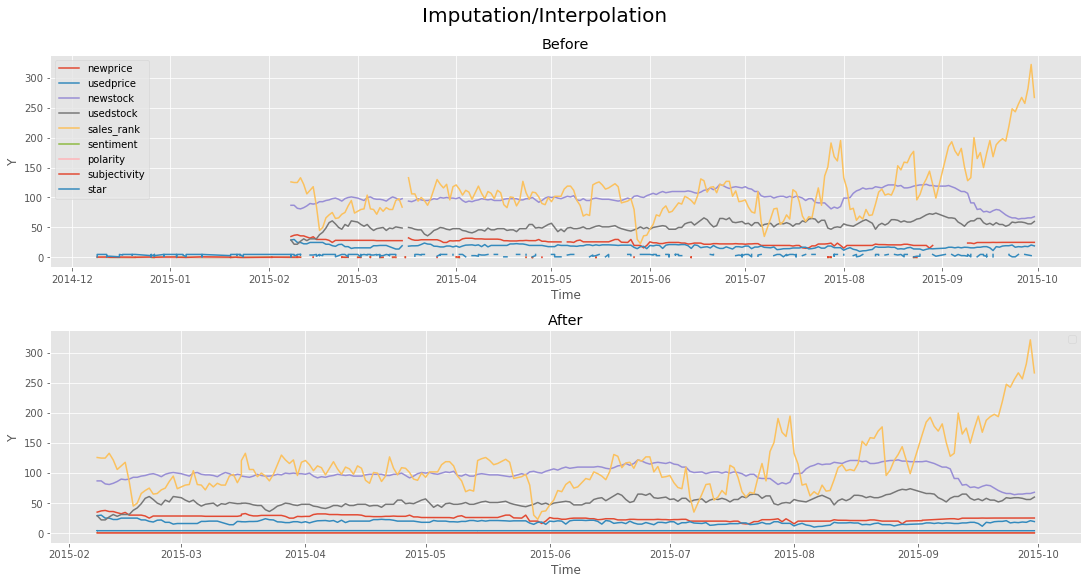

In [73]:
tmp_df = df_filtered[1].copy()

with plt.style.context('ggplot'):
    with plt.rc_context({
        'figure.figsize': (15,8), 
#         'legend.fontsize': 'xx-large', 
#          'xtick.color': 'white',
        }):
        
        fig = plt.figure(constrained_layout=True)
        spec = fig.add_gridspec(ncols=1, nrows=2)
        fig.suptitle('Imputation/Interpolation', size=20)
        
        ax0 = fig.add_subplot(spec[0, 0])
        ax0.plot(tmp_df)
        ax0.set(title='Before',
              xlabel='Time',
              ylabel='Y')
        ax0.legend(tmp_df.columns)
        
        tmp_df.iloc[:, -4:] = tmp_df.iloc[:, -4:].expanding(1).mean()
        tmp_df = tmp_df.loc[f'{tmp_df["newprice"].first_valid_index().strftime("%Y-%m-%d")}':, :]
        tmp_df.interpolate(inplace=True)
        ax1 = fig.add_subplot(spec[1, 0])
        ax1.plot(tmp_df)
        ax1.set(title='After',
              xlabel='Time',
              ylabel='Y')
        ax1.legend()
        plt.savefig('imputation.png', bbox_inches='tight')

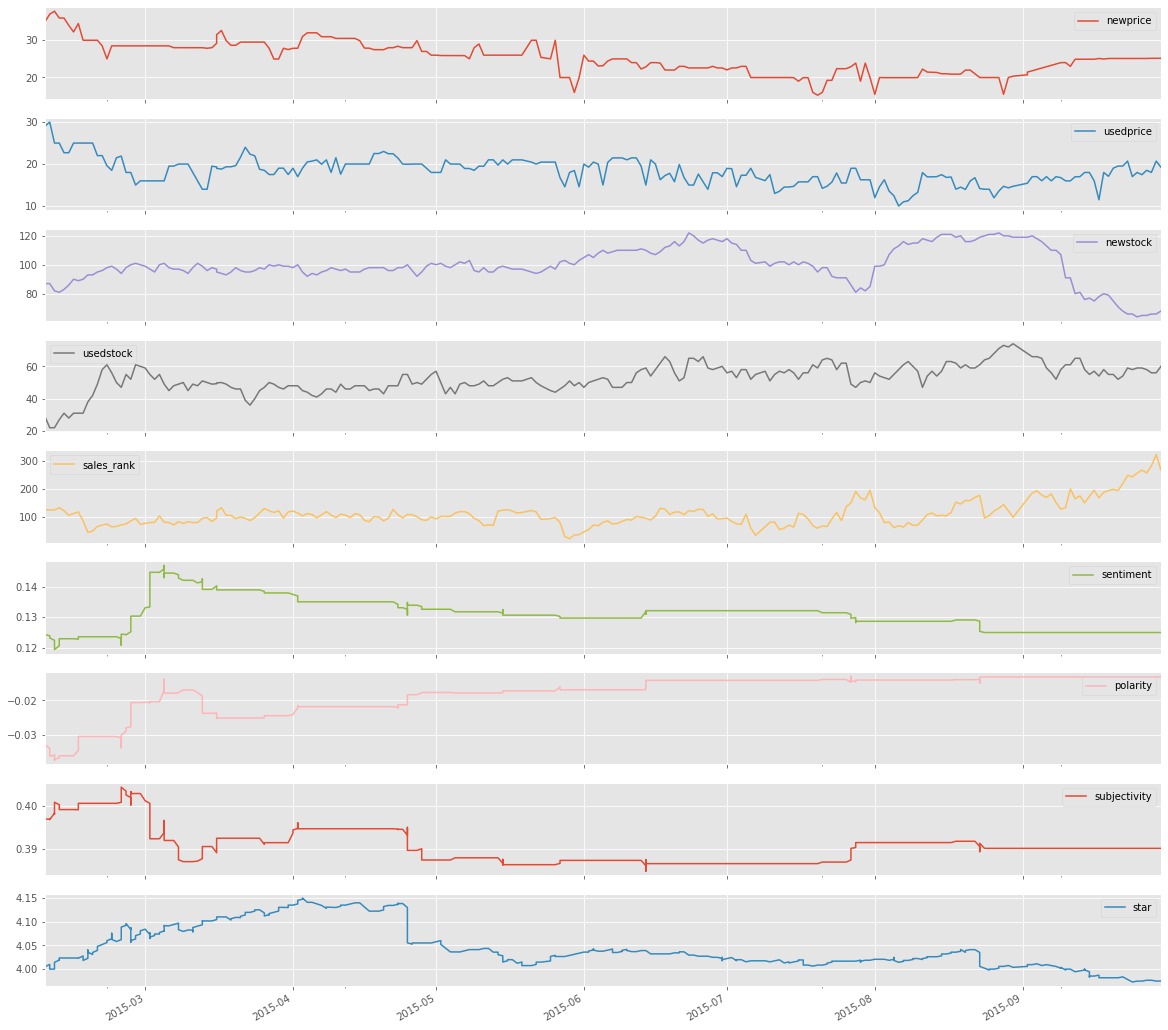

In [78]:
with plt.style.context('ggplot'):
    with plt.rc_context({
        'figure.figsize': (20,20), 
#         'legend.fontsize': 'xx-large', 
#          'xtick.color': 'white',
        }):
        tmp_df.plot(subplots=True)
        plt.savefig('allplots.png', bbox_inches='tight')

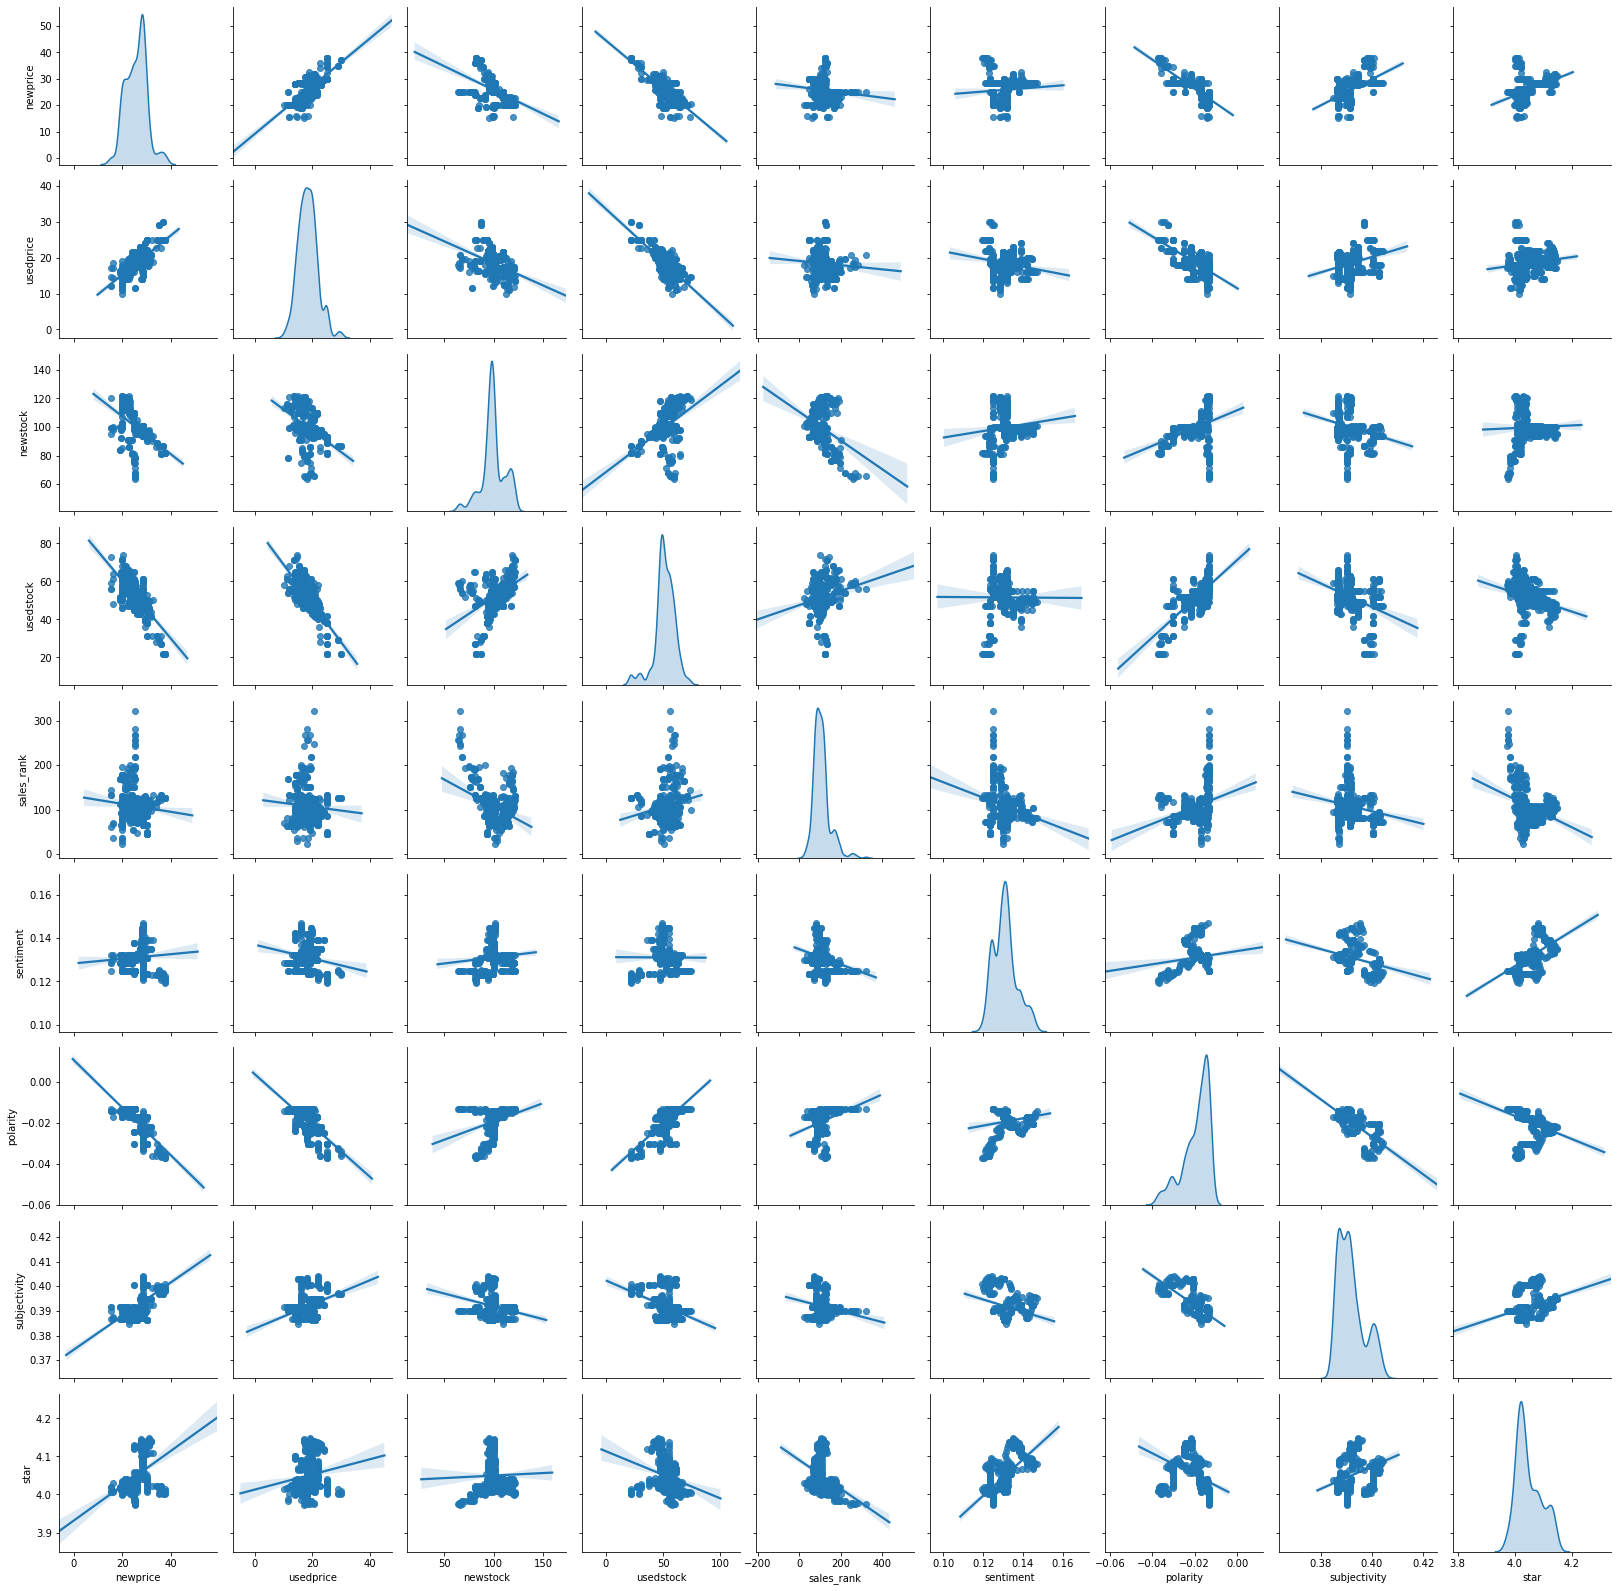

In [92]:
# Correlation map on features (bar tradein_value and star)

import seaborn as sns

pp = sns.pairplot(tmp_df, 
#                   height=1.8, aspect=1.8,
                  kind='reg',
#                   plot_kws=dict(linewidth=0.5, s=80, alpha=0.8),
                  diag_kind="kde", diag_kws=dict(shade=True),
                 )

fig = pp.fig
fig.subplots_adjust(top=0.98, wspace=0.1, hspace=0.1)
# t = fig.suptitle('Variables Pairwise Plots', fontsize=50);

plt.savefig('IMG/pairplot.png', bbox_inches='tight')

In [93]:
from statsmodels.tsa.stattools import acf

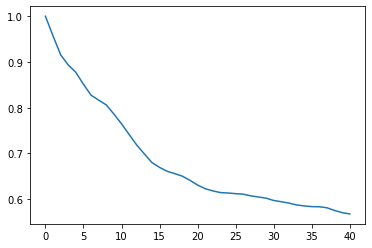

In [97]:
plt.plot(acf(tmp_df['newprice']))

In [105]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [113]:
list(range(3))

[0, 1, 2]

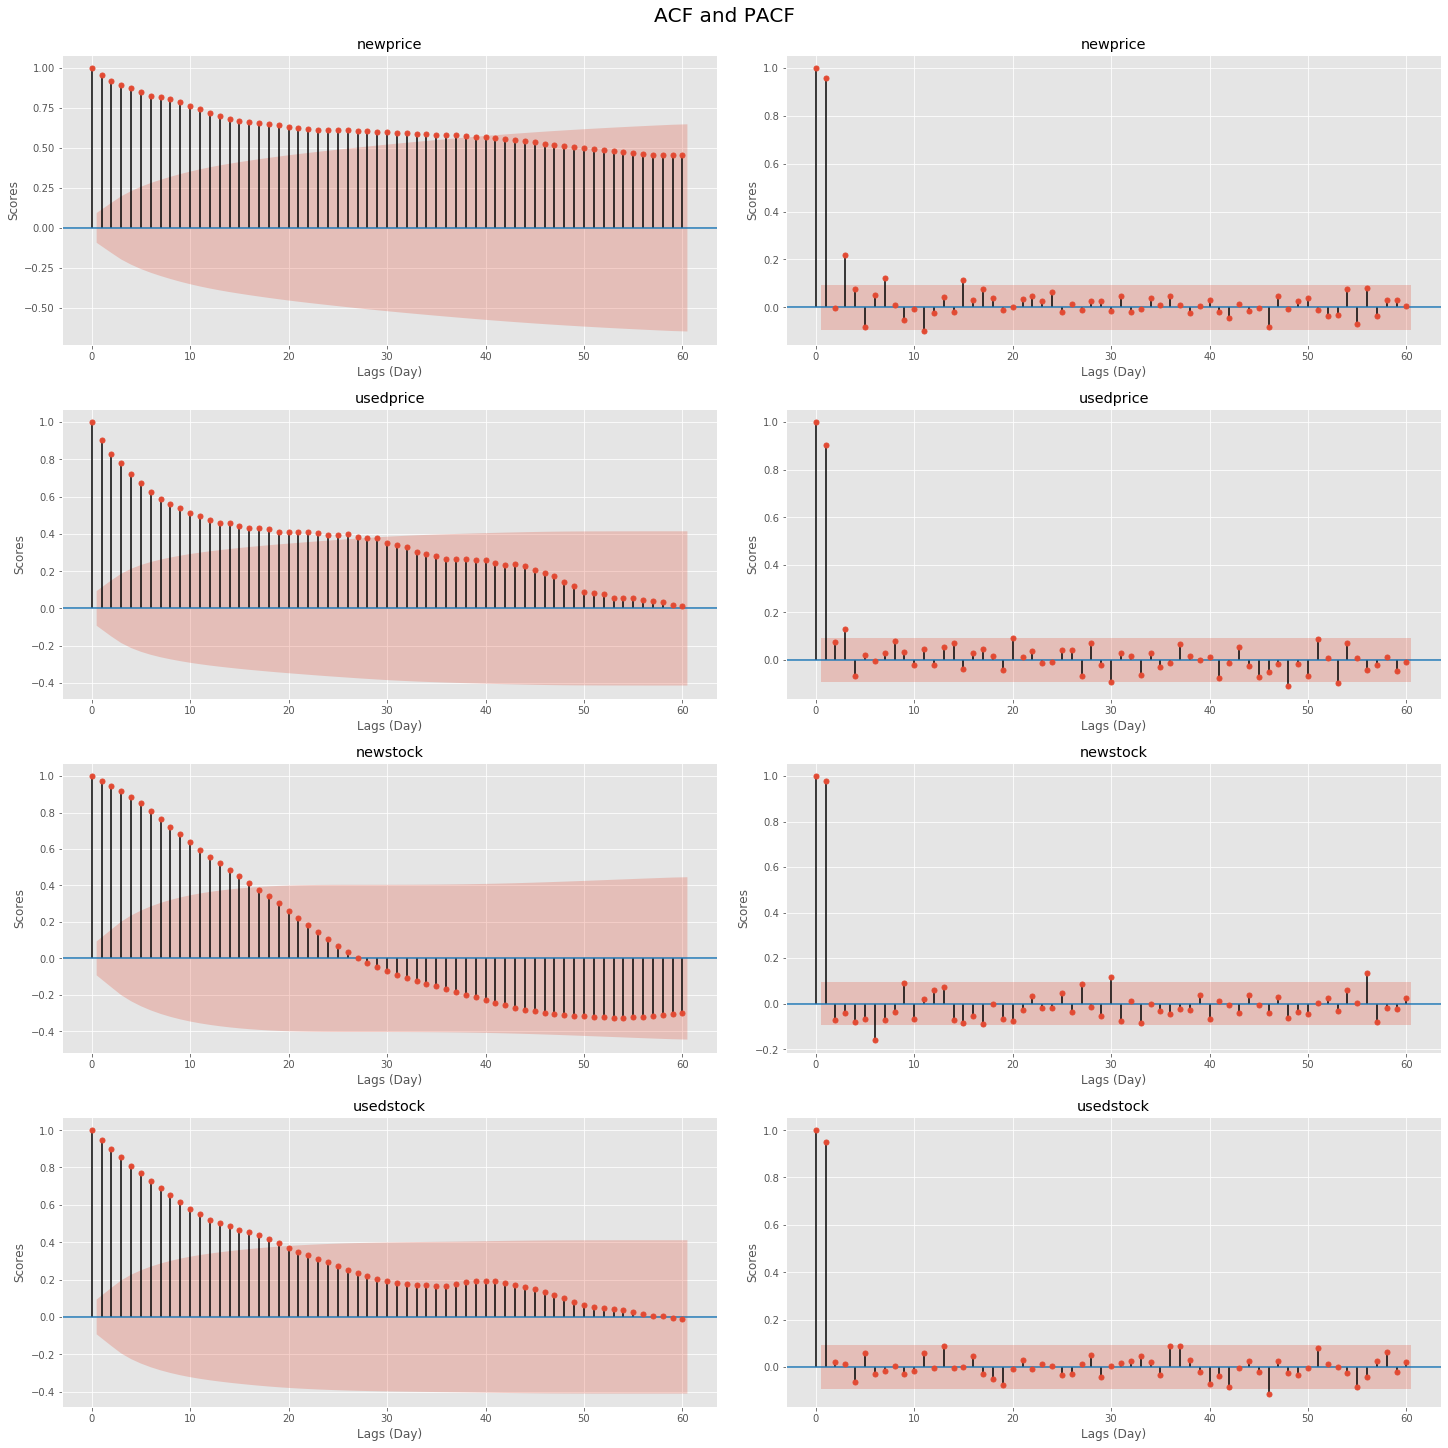

In [118]:
with plt.style.context('ggplot'):
    with plt.rc_context({
        'figure.figsize': (20,20), 
#         'legend.fontsize': 'xx-large', 
        }):
        
        fig = plt.figure(constrained_layout=True)
        spec = fig.add_gridspec(nrows=4, ncols=2)
        fig.suptitle('ACF and PACF', size=20)
        
        for row in range(4):
            for col in range(2):
                ax = fig.add_subplot(spec[row, col])
                if col % 2 == 0:
                    plot_acf(tmp_df.iloc[:, row], lags=60, ax=ax)
                    ax.set(title=f'{tmp_df.columns[row]}',
                          xlabel='Lags (Day)',
                          ylabel='Scores')
                else:
                    plot_pacf(tmp_df.iloc[:, row], lags=60, ax=ax)
                    ax.set(title=f'{tmp_df.columns[row]}',
                          xlabel='Lags (Day)',
                          ylabel='Scores')
        plt.savefig('acf.png', bbox_inches='tight')

In [3]:
import pickle 

with open('final_final_star.pkl', 'rb') as F:
    final_final_list = pickle.load(F)
len(final_final_list)

44

In [4]:
# creation of lags and futures
def create_feature(df):
    for name in df.columns[:4]:
        df[f'{name}_t-1'] = df[name].shift(1)
        df[f'{name}_t+1'] = df[name].shift(-1)
    return df

In [5]:
dele_list_features = [create_feature(df) for df in final_final_list]
dele_list_features[0].head()

,newprice,usedprice,newstock,usedstock,sales_rank,sentiment,polarity,subjectivity,star,newprice_t-1,newprice_t+1,usedprice_t-1,usedprice_t+1,newstock_t-1,newstock_t+1,usedstock_t-1,usedstock_t+1
2015-02-08,56.3,49.40,12.0,8.0,24.0,-0.209974,-0.142789,0.273410,4.958995,NaN,52.00,NaN,50.00,NaN,14.0,NaN,8.0
2015-02-09,52.0,50.00,14.0,8.0,23.0,-0.209958,-0.142484,0.273572,4.957941,56.3,55.00,49.40,47.99,12.0,16.0,8.0,11.0
2015-02-10,55.0,47.99,16.0,11.0,24.0,-0.209949,-0.142332,0.273653,4.957417,52.0,54.40,50.00,50.99,14.0,17.0,8.0,7.0
2015-02-11,54.4,50.99,17.0,7.0,22.0,-0.209827,-0.140501,0.274654,4.951306,55.0,54.40,47.99,48.99,16.0,16.0,11.0,11.0
2015-02-12,54.4,48.99,16.0,11.0,22.0,-0.209580,-0.137857,0.276163,4.942922,54.4,54.37,50.99,50.99,17.0,17.0,7.0,8.0


In [6]:
def change_name(df):
    for name in df.columns[:9]:
        df.rename(columns={f'{name}': f'{name}_t'}, inplace=True)
    return df

In [7]:
dele_list_rename = [change_name(df) for df in dele_list_features]
dele_list_rename[0].head()

,newprice_t,usedprice_t,newstock_t,usedstock_t,sales_rank_t,sentiment_t,polarity_t,subjectivity_t,star_t,newprice_t-1,newprice_t+1,usedprice_t-1,usedprice_t+1,newstock_t-1,newstock_t+1,usedstock_t-1,usedstock_t+1
2015-02-08,56.3,49.40,12.0,8.0,24.0,-0.209974,-0.142789,0.273410,4.958995,NaN,52.00,NaN,50.00,NaN,14.0,NaN,8.0
2015-02-09,52.0,50.00,14.0,8.0,23.0,-0.209958,-0.142484,0.273572,4.957941,56.3,55.00,49.40,47.99,12.0,16.0,8.0,11.0
2015-02-10,55.0,47.99,16.0,11.0,24.0,-0.209949,-0.142332,0.273653,4.957417,52.0,54.40,50.00,50.99,14.0,17.0,8.0,7.0
2015-02-11,54.4,50.99,17.0,7.0,22.0,-0.209827,-0.140501,0.274654,4.951306,55.0,54.40,47.99,48.99,16.0,16.0,11.0,11.0
2015-02-12,54.4,48.99,16.0,11.0,22.0,-0.209580,-0.137857,0.276163,4.942922,54.4,54.37,50.99,50.99,17.0,17.0,7.0,8.0


In [8]:
def drop_none(df):
    df.dropna(inplace=True)
    return df

In [9]:
dele_list_dropna = [drop_none(df) for df in dele_list_rename]
dele_list_dropna[0].head()

,newprice_t,usedprice_t,newstock_t,usedstock_t,sales_rank_t,sentiment_t,polarity_t,subjectivity_t,star_t,newprice_t-1,newprice_t+1,usedprice_t-1,usedprice_t+1,newstock_t-1,newstock_t+1,usedstock_t-1,usedstock_t+1
2015-02-09,52.00,50.00,14.0,8.0,23.0,-0.209958,-0.142484,0.273572,4.957941,56.3,55.00,49.40,47.99,12.0,16.0,8.0,11.0
2015-02-10,55.00,47.99,16.0,11.0,24.0,-0.209949,-0.142332,0.273653,4.957417,52.0,54.40,50.00,50.99,14.0,17.0,8.0,7.0
2015-02-11,54.40,50.99,17.0,7.0,22.0,-0.209827,-0.140501,0.274654,4.951306,55.0,54.40,47.99,48.99,16.0,16.0,11.0,11.0
2015-02-12,54.40,48.99,16.0,11.0,22.0,-0.209580,-0.137857,0.276163,4.942922,54.4,54.37,50.99,50.99,17.0,17.0,7.0,8.0
2015-02-13,54.37,50.99,17.0,8.0,27.0,-0.209547,-0.137559,0.276338,4.942000,54.4,54.37,48.99,49.79,16.0,17.0,11.0,12.0


In [10]:
with open('final_final_final.pkl', 'wb') as F:
    pickle.dump(dele_list_dropna, F)

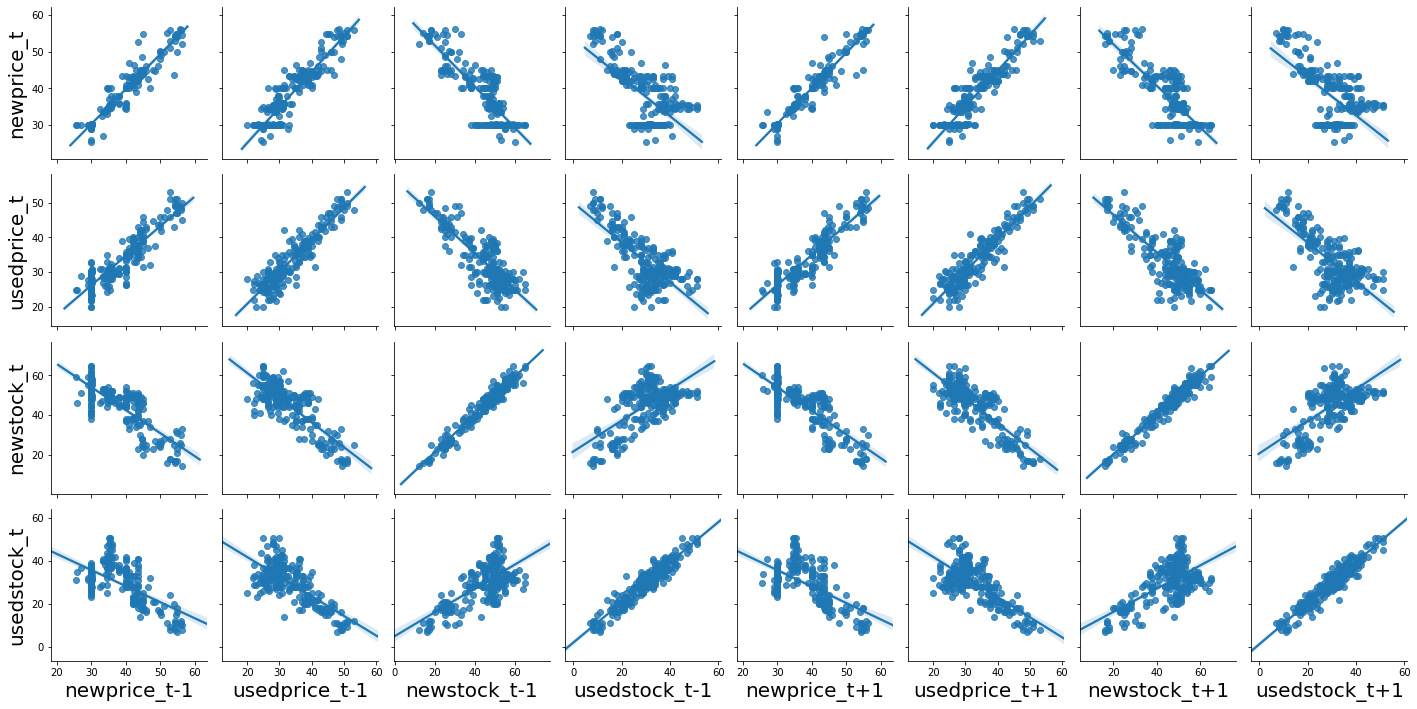

In [242]:
import seaborn as sns

with plt.rc_context({
    "axes.labelsize": 20
}):
    
    pp = sns.pairplot(dele_list_dropna[0], 
                      x_vars=['newprice_t-1', 'usedprice_t-1', 'newstock_t-1', 'usedstock_t-1', 
                             'newprice_t+1', 'usedprice_t+1', 'newstock_t+1', 'usedstock_t+1'],
                      y_vars=['newprice_t', 'usedprice_t', 'newstock_t', 'usedstock_t'],
    #                   height=1.8, aspect=1.8,
                      kind='reg',
    #                   plot_kws=dict(linewidth=0.5, s=80, alpha=0.8),
    #                   diag_kind="kde", diag_kws=dict(shade=True),
                     )

    fig = pp.fig
    fig.subplots_adjust(top=0.98, wspace=0.1, hspace=0.1)
    # t = fig.suptitle('Variables Pairwise Plots', fontsize=50);

    plt.savefig('IMG/timepair.png', bbox_inches='tight')

## Model: OLS

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNet

import numpy as np

def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def AIC(true, pred, k):
    return len(true)*np.log(np.sum((true - pred)**2)/len(true)) + 2*k

def BIC(true, pred, k):
    return len(true)*np.log(np.sum((true - pred)**2)/len(true)) + k*np.log(len(true))

In [12]:
tmp_data = dele_list_dropna[0]

In [13]:
def main_OLS():
    ENDO = ['newprice_t+1', 'usedprice_t+1', 'newstock_t+1', 'usedstock_t+1']
    all_metric = []
    
    for i in ENDO:
        metric_df_list = []
        for idx, df in enumerate(dele_list_dropna):
            X, y = df.drop(columns=ENDO).copy(), df[i].copy()
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)
            mod = LinearRegression().fit(X_train, y_train)
            y_pred = mod.predict(X_test)
            mape = MAPE(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)
            aic = AIC(y_test, y_pred, len(X_train.columns))
            bic = BIC(y_test, y_pred, len(X_train.columns))
            
            metric_dict = {
                f'{i}_ID': idx,
                f'{i}_R2': r2,
                f'{i}_MAE': mae,
                f'{i}_RMSE': rmse,
                f'{i}_MAPE': mape,
                f'{i}_AIC': aic,
                f'{i}_BIC': bic,
            }
            metric_df_list.append(pd.DataFrame(metric_dict, index=[idx]))
        all_metric.append(pd.concat(metric_df_list))
        
    final_price, final_stock = summ(all_metric)
    
    return final_price, final_stock

In [374]:
def summ(metric_lst):
    del metric_lst[0]['newprice_t+1_ID']
    del metric_lst[1]['usedprice_t+1_ID']
    del metric_lst[2]['newstock_t+1_ID']
    del metric_lst[3]['usedstock_t+1_ID']
    name0 = metric_lst[0].columns
    name1 = metric_lst[1].columns
    name2 = metric_lst[2].columns
    name3 = metric_lst[3].columns
    metric_lst[0].columns = [name.replace('new', '') for name in name0]
    metric_lst[1].columns = [name.replace('used', '') for name in name1]
    metric_lst[2].columns = [name.replace('new', '') for name in name2]
    metric_lst[3].columns = [name.replace('used', '') for name in name3]
    metric_price = metric_lst[0].add(metric_lst[1]) / 2
    metric_stock = metric_lst[2].add(metric_lst[3]) / 2
    final_dict_price = {
        'MOD': 'OLS', 
        'R2_mean': np.mean(metric_price.iloc[:, 0]),
        'MAE_mean': np.mean(metric_price.iloc[:, 1]),
        'RMSE_mean': np.mean(metric_price.iloc[:, 2]),
        'MAPE_mean': np.mean(metric_price.iloc[:, 3]),
        'AIC_mean': np.mean(metric_price.iloc[:, 4]),
        'BIC_mean': np.mean(metric_price.iloc[:, 5]),
        'R2_median': np.median(metric_price.iloc[:, 0]),
        'MAE_median': np.median(metric_price.iloc[:, 1]),
        'RMSE_median': np.median(metric_price.iloc[:, 2]),
        'MAPE_median': np.median(metric_price.iloc[:, 3]),
        'AIC_median': np.median(metric_price.iloc[:, 4]),
        'BIC_median': np.median(metric_price.iloc[:, 5]),
                      }
    final_dict_stock = {
        'MOD': 'OLS', 
        'R2_mean': np.mean(metric_stock.iloc[:, 0]),
        'MAE_mean': np.mean(metric_stock.iloc[:, 1]),
        'RMSE_mean': np.mean(metric_stock.iloc[:, 2]),
        'MAPE_mean': np.mean(metric_stock.iloc[:, 3]),
        'AIC_mean': np.mean(metric_stock.iloc[:, 4]),
        'BIC_mean': np.mean(metric_stock.iloc[:, 5]),
        'R2_median': np.median(metric_stock.iloc[:, 0]),
        'MAE_median': np.median(metric_stock.iloc[:, 1]),
        'RMSE_median': np.median(metric_stock.iloc[:, 2]),
        'MAPE_median': np.median(metric_stock.iloc[:, 3]),
        'AIC_median': np.median(metric_stock.iloc[:, 4]),
        'BIC_median': np.median(metric_stock.iloc[:, 5]),
                      }

    return final_dict_price, final_dict_stock

In [375]:
metric_ols_price, metric_ols_stock = main_OLS()

In [376]:
metric_ols_price, metric_ols_stock

({'MOD': 'OLS',
  'R2_mean': -8.886666123489087e+26,
  'MAE_mean': 2.6924052307143937,
  'RMSE_mean': 3.2347637850816016,
  'MAPE_mean': 19.798930820202962,
  'AIC_mean': 137.31706560698913,
  'BIC_mean': 166.26067344125966,
  'R2_median': -1.6116029349483925,
  'MAE_median': 2.0854596075824654,
  'RMSE_median': 2.5510515658239177,
  'MAPE_median': 15.63790315063328,
  'AIC_median': 142.74749201430768,
  'BIC_median': 171.79087657407206},
 {'MOD': 'OLS',
  'R2_mean': -1.1318896259573468,
  'MAE_mean': 5.443747187481059,
  'RMSE_mean': 6.477816134364872,
  'MAPE_mean': 10.89831382413583,
  'AIC_mean': 241.9346659125569,
  'BIC_mean': 270.8782737468274,
  'R2_median': -0.12495252036552007,
  'MAE_median': 3.9335052870943477,
  'RMSE_median': 4.9244428679707966,
  'MAPE_median': 8.997514326609483,
  'AIC_median': 236.79548712947064,
  'BIC_median': 265.838871689235})

In [494]:
def rounder(dic):
    for key, val in dic.items():
        if type(val) == np.float64:
            dic[key] = round(val, ndigits=5)
    return dic

In [496]:
rounder(metric_ols_price), rounder(metric_ols_stock)

({'MOD': 'OLS',
  'R2_mean': -8.886666123489085e+26,
  'MAE_mean': 2.69241,
  'RMSE_mean': 3.23476,
  'MAPE_mean': 19.79893,
  'AIC_mean': 137.31707,
  'BIC_mean': 166.26067,
  'R2_median': -1.6116,
  'MAE_median': 2.08546,
  'RMSE_median': 2.55105,
  'MAPE_median': 15.6379,
  'AIC_median': 142.74749,
  'BIC_median': 171.79088},
 {'MOD': 'OLS',
  'R2_mean': -1.13189,
  'MAE_mean': 5.44375,
  'RMSE_mean': 6.47782,
  'MAPE_mean': 10.89831,
  'AIC_mean': 241.93467,
  'BIC_mean': 270.87827,
  'R2_median': -0.12495,
  'MAE_median': 3.93351,
  'RMSE_median': 4.92444,
  'MAPE_median': 8.99751,
  'AIC_median': 236.79549,
  'BIC_median': 265.83887})

In [245]:
ENDO = [name for name in tmp_data.columns if 't+1' in name]

In [246]:
ENDO

['newprice_t+1', 'usedprice_t+1', 'newstock_t+1', 'usedstock_t+1']

In [247]:
X, y = tmp_data.drop(columns=ENDO).copy(), tmp_data[ENDO[0]].copy()

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)

In [253]:
lr = LinearRegression()
res = lr.fit(X_train, y_train)

In [258]:
pred = res.predict(X_test)

In [259]:
MAPE(y_test, pred)

6.709938588924071

In [273]:
AIC(y_test, pred, len(X_train.columns))

BIC(y_test, pred, len(X_train.columns))

In [278]:
r2_score(y_test, pred)

-10.391995564675382

In [279]:
mean_absolute_error(y_test, pred)

2.000571843723836

In [281]:
np.sqrt(mean_squared_error(y_test, pred))

2.514806287780796

## Model: Fixed Effect Panel

In [14]:
from collections import deque
dequeue = deque(range(len(dele_list_dropna)))

for df in dele_list_dropna:
    df['Entity'] = dequeue.popleft()

In [15]:
dele_list_dropna[0].head()

,newprice_t,usedprice_t,newstock_t,usedstock_t,sales_rank_t,sentiment_t,polarity_t,subjectivity_t,star_t,newprice_t-1,newprice_t+1,usedprice_t-1,usedprice_t+1,newstock_t-1,newstock_t+1,usedstock_t-1,usedstock_t+1,Entity
2015-02-09,52.00,50.00,14.0,8.0,23.0,-0.209958,-0.142484,0.273572,4.957941,56.3,55.00,49.40,47.99,12.0,16.0,8.0,11.0,0
2015-02-10,55.00,47.99,16.0,11.0,24.0,-0.209949,-0.142332,0.273653,4.957417,52.0,54.40,50.00,50.99,14.0,17.0,8.0,7.0,0
2015-02-11,54.40,50.99,17.0,7.0,22.0,-0.209827,-0.140501,0.274654,4.951306,55.0,54.40,47.99,48.99,16.0,16.0,11.0,11.0,0
2015-02-12,54.40,48.99,16.0,11.0,22.0,-0.209580,-0.137857,0.276163,4.942922,54.4,54.37,50.99,50.99,17.0,17.0,7.0,8.0,0
2015-02-13,54.37,50.99,17.0,8.0,27.0,-0.209547,-0.137559,0.276338,4.942000,54.4,54.37,48.99,49.79,16.0,17.0,11.0,12.0,0


In [17]:
import pandas as pd

dele_panel = pd.concat(dele_list_dropna, axis=0)
dele_panel.reset_index(inplace=True)
dele_panel.set_index(['Entity', 'index'], inplace=True)
# dele_panel.dropna(inplace=True)
dele_panel.head()

newprice_t  usedprice_t  newstock_t  usedstock_t  \
Entity index                                                          
0      2015-02-09       52.00        50.00        14.0          8.0   
       2015-02-10       55.00        47.99        16.0         11.0   
       2015-02-11       54.40        50.99        17.0          7.0   
       2015-02-12       54.40        48.99        16.0         11.0   
       2015-02-13       54.37        50.99        17.0          8.0   

                   sales_rank_t  sentiment_t  polarity_t  subjectivity_t  \
Entity index                                                               
0      2015-02-09          23.0    -0.209958   -0.142484        0.273572   
       2015-02-10          24.0    -0.209949   -0.142332        0.273653   
       2015-02-11          22.0    -0.209827   -0.140501        0.274654   
       2015-02-12          22.0    -0.209580   -0.137857        0.276163   
       2015-02-13          27.0    -0.209547   -0.137559        0.276338   

                     star_t  newprice_t-1  newprice_t+1  usedprice_t-1  \
Entity index                                                             
0      2015-02-09  4.957941          56.3         55.00          49.40   
       2015-02-10  4.957417          52.0         54.40          50.00   
       2015-02-11  4.951306          55.0         54.40          47.99   
       2015-02-12  4.942922          54.4         54.37          50.99   
       2015-02-13  4.942000          54.4         54.37          48.99   

                   usedprice_t+1  newstock_t-1  newstock_t+1  usedstock_t-1  \
Entity index                                                                  
0      2015-02-09          47.99          12.0          16.0            8.0   
       2015-02-10          50.99          14.0          17.0            8.0   
       2015-02-11          48.99          16.0          16.0           11.0   
       2015-02-12          50.99          17.0          17.0            7.0   
       2015-02-13          49.79          16.0          17.0           11.0   

                   usedstock_t+1  
Entity index                      
0      2015-02-09           11.0  
       2015-02-10            7.0  
       2015-02-11           11.0  
       2015-02-12            8.0  
       2015-02-13           12.0

In [18]:
dele_panel.query(f'Entity == {0}').head()

newprice_t  usedprice_t  newstock_t  usedstock_t  \
Entity index                                                          
0      2015-02-09       52.00        50.00        14.0          8.0   
       2015-02-10       55.00        47.99        16.0         11.0   
       2015-02-11       54.40        50.99        17.0          7.0   
       2015-02-12       54.40        48.99        16.0         11.0   
       2015-02-13       54.37        50.99        17.0          8.0   

                   sales_rank_t  sentiment_t  polarity_t  subjectivity_t  \
Entity index                                                               
0      2015-02-09          23.0    -0.209958   -0.142484        0.273572   
       2015-02-10          24.0    -0.209949   -0.142332        0.273653   
       2015-02-11          22.0    -0.209827   -0.140501        0.274654   
       2015-02-12          22.0    -0.209580   -0.137857        0.276163   
       2015-02-13          27.0    -0.209547   -0.137559        0.276338   

                     star_t  newprice_t-1  newprice_t+1  usedprice_t-1  \
Entity index                                                             
0      2015-02-09  4.957941          56.3         55.00          49.40   
       2015-02-10  4.957417          52.0         54.40          50.00   
       2015-02-11  4.951306          55.0         54.40          47.99   
       2015-02-12  4.942922          54.4         54.37          50.99   
       2015-02-13  4.942000          54.4         54.37          48.99   

                   usedprice_t+1  newstock_t-1  newstock_t+1  usedstock_t-1  \
Entity index                                                                  
0      2015-02-09          47.99          12.0          16.0            8.0   
       2015-02-10          50.99          14.0          17.0            8.0   
       2015-02-11          48.99          16.0          16.0           11.0   
       2015-02-12          50.99          17.0          17.0            7.0   
       2015-02-13          49.79          16.0          17.0           11.0   

                   usedstock_t+1  
Entity index                      
0      2015-02-09           11.0  
       2015-02-10            7.0  
       2015-02-11           11.0  
       2015-02-12            8.0  
       2015-02-13           12.0

In [19]:
panel_train = []
panel_test = []

for i in dele_panel.groupby('Entity').first().index.values:
    panel_train.append(dele_panel.query(f'Entity == {i}').iloc[:160, :].copy())
    panel_test.append(dele_panel.query(f'Entity == {i}').iloc[160:, :].copy())

panel_train = pd.concat(panel_train)
panel_test = pd.concat(panel_test)

In [20]:
panel_train.shape, panel_test.shape

((7040, 17), (2892, 17))

In [21]:
from linearmodels import PanelOLS

/home/oceanbao/miniconda3/envs/dev_ml/lib/python3.7/site-packages/linearmodels/panel/data.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import (Categorical, DataFrame, Index, MultiIndex, Panel, Series,


In [22]:
mod = PanelOLS(panel_train['newprice_t+1'], panel_train.drop(columns='newprice_t+1'), entity_effects=True).fit()

In [23]:
mod

Dep. Variable:,newprice_t+1,R-squared:,0.7955
Estimator:,PanelOLS,R-squared (Between):,0.9844
No. Observations:,7040,R-squared (Within):,0.7955
Date:,"Mon, Aug 12 2019",R-squared (Overall):,0.9810
Time:,15:10:07,Log-likelihood,-1.284e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1696.6
Entities:,44,P-value,0.0000
Avg Obs:,160.00,Distribution:,"F(16,6980)"
Min Obs:,160.00,,
Max Obs:,160.00,F-statistic (robust):,1696.6


In [462]:
mod.predict(panel_test.drop(columns='newprice_t+1'))['predictions'].values

array([32.3136477 , 32.10052876, 32.5333262 , ..., 17.18816273,
       17.52998425, 17.71937231])

In [24]:
def main_FE():
    ENDO = ['newprice_t+1', 'usedprice_t+1', 'newstock_t+1', 'usedstock_t+1']
    all_metric = []
    
    for i in ENDO:        
        mod = PanelOLS(panel_train[i], panel_train.drop(columns=ENDO), entity_effects=True).fit()
        y_pred = mod.predict(panel_test.drop(columns=ENDO))['predictions'].values
        y_test = panel_test[i]
        
        mape = MAPE(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        aic = AIC(y_test, y_pred, len(panel_train.columns))
        bic = BIC(y_test, y_pred, len(panel_train.columns))

        metric_dict = {
            f'{i}_ID': i,
            f'{i}_R2': r2,
            f'{i}_MAE': mae,
            f'{i}_RMSE': rmse,
            f'{i}_MAPE': mape,
            f'{i}_AIC': aic,
            f'{i}_BIC': bic,
        }
        all_metric.append(metric_dict)

    return all_metric, mod

In [25]:
fe_metrics, mod = main_FE()

In [525]:
fe_metrics

[{'newprice_t+1_ID': 'newprice_t+1',
  'newprice_t+1_R2': 0.9250987909294215,
  'newprice_t+1_MAE': 2.4653764482592093,
  'newprice_t+1_RMSE': 3.0288828101442813,
  'newprice_t+1_MAPE': 19.47152638308497,
  'newprice_t+1_AIC': 6443.793182173516,
  'newprice_t+1_BIC': 6545.278143089253},
 {'usedprice_t+1_ID': 'usedprice_t+1',
  'usedprice_t+1_R2': 0.7347457949443565,
  'usedprice_t+1_MAE': 3.7750606018993014,
  'usedprice_t+1_RMSE': 4.638017290702331,
  'usedprice_t+1_MAPE': 50.90772797997347,
  'usedprice_t+1_AIC': 8908.315816421065,
  'usedprice_t+1_BIC': 9009.800777336803},
 {'newstock_t+1_ID': 'newstock_t+1',
  'newstock_t+1_R2': 0.9548047055461512,
  'newstock_t+1_MAE': 4.34330370751945,
  'newstock_t+1_RMSE': 5.1860205883976125,
  'newstock_t+1_MAPE': 8.221555691696695,
  'newstock_t+1_AIC': 9554.271144691129,
  'newstock_t+1_BIC': 9655.756105606866},
 {'usedstock_t+1_ID': 'usedstock_t+1',
  'usedstock_t+1_R2': 0.9893540505787759,
  'usedstock_t+1_MAE': 4.183905722964437,
  'useds

In [526]:
metric_fe_price = {
    'MOD': 'FE',
    'R2': np.mean((fe_metrics[0]['newprice_t+1_R2'], fe_metrics[1]['usedprice_t+1_R2'])),
    'MAE': np.mean((fe_metrics[0]['newprice_t+1_MAE'], fe_metrics[1]['usedprice_t+1_MAE'])),
    'RMSE': np.mean((fe_metrics[0]['newprice_t+1_RMSE'], fe_metrics[1]['usedprice_t+1_RMSE'])),
    'MAPE': np.mean((fe_metrics[0]['newprice_t+1_MAPE'], fe_metrics[1]['usedprice_t+1_MAPE'])),
    'AIC': np.mean((fe_metrics[0]['newprice_t+1_AIC'], fe_metrics[1]['usedprice_t+1_AIC'])),
    'BIC': np.mean((fe_metrics[0]['newprice_t+1_BIC'], fe_metrics[1]['usedprice_t+1_BIC'])),
}

In [527]:
rounder(metric_fe_price)

{'MOD': 'FE',
 'R2': 0.82992,
 'MAE': 3.12022,
 'RMSE': 3.83345,
 'MAPE': 35.18963,
 'AIC': 7676.0545,
 'BIC': 7777.53946}

In [528]:
metric_fe_stock = {
    'MOD': 'FE',
    'R2': np.mean((fe_metrics[2]['newstock_t+1_R2'], fe_metrics[3]['usedstock_t+1_R2'])),
    'MAE': np.mean((fe_metrics[2]['newstock_t+1_MAE'], fe_metrics[3]['usedstock_t+1_MAE'])),
    'RMSE': np.mean((fe_metrics[2]['newstock_t+1_RMSE'], fe_metrics[3]['usedstock_t+1_RMSE'])),
    'MAPE': np.mean((fe_metrics[2]['newstock_t+1_MAPE'], fe_metrics[3]['usedstock_t+1_MAPE'])),
    'AIC': np.mean((fe_metrics[2]['newstock_t+1_AIC'], fe_metrics[3]['usedstock_t+1_AIC'])),
    'BIC': np.mean((fe_metrics[2]['newstock_t+1_BIC'], fe_metrics[3]['usedstock_t+1_BIC'])),
}

In [529]:
rounder(metric_fe_stock)

{'MOD': 'FE',
 'R2': 0.97208,
 'MAE': 4.2636,
 'RMSE': 5.08751,
 'MAPE': 9.97788,
 'AIC': 9442.26003,
 'BIC': 9543.74499}

In [537]:
# ElasticNet
def main_Elastic():
    ENDO = ['newprice_t+1', 'usedprice_t+1', 'newstock_t+1', 'usedstock_t+1']
    all_metric = []
    
    for i in ENDO:
        metric_df_list = []
        for idx, df in enumerate(dele_list_dropna):
            X, y = df.drop(columns=ENDO).copy(), df[i].copy()
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)
            mod = ElasticNet().fit(X_train, y_train)
            y_pred = mod.predict(X_test)
            mape = MAPE(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)
            aic = AIC(y_test, y_pred, len(X_train.columns))
            bic = BIC(y_test, y_pred, len(X_train.columns))
            
            metric_dict = {
                f'{i}_ID': idx,
                f'{i}_R2': r2,
                f'{i}_MAE': mae,
                f'{i}_RMSE': rmse,
                f'{i}_MAPE': mape,
                f'{i}_AIC': aic,
                f'{i}_BIC': bic,
            }
            metric_df_list.append(pd.DataFrame(metric_dict, index=[idx]))
        all_metric.append(pd.concat(metric_df_list).mean(axis=0))
        all_metric.append(pd.concat(metric_df_list).median(axis=0))
        
    
    return all_metric

In [558]:
all_metric_EN = main_Elastic()

In [560]:
def summ(metric_lst):
    new_lst = []
    for i in metric_lst:
        name = i.index
        i.index = [n.replace('new', '') for n in name]
        name = i.index
        i.index = [n.replace('used', '') for n in name]
        new_lst.append(i)
    s1, s2, s3, s4, s5, s6, s7, s8 = (i for i in new_lst)

    return [(s1+s3)/2, (s2+s4)/2, (s5+s7)/2, (s6+s8)/2]

In [561]:
summ(all_metric_EN)

[price_t+1_ID      2.150000e+01
 price_t+1_R2     -3.086107e+26
 price_t+1_MAE     1.498539e+00
 price_t+1_RMSE    1.873837e+00
 price_t+1_MAPE    1.271341e+01
 price_t+1_AIC     9.140368e+01
 price_t+1_BIC     1.225737e+02
 dtype: float64, price_t+1_ID       21.500000
 price_t+1_R2       -0.011128
 price_t+1_MAE       1.296471
 price_t+1_RMSE      1.705102
 price_t+1_MAPE      9.836387
 price_t+1_AIC     101.490519
 price_t+1_BIC     132.768010
 dtype: float64, stock_t+1_ID       21.500000
 stock_t+1_R2        0.674827
 stock_t+1_MAE       2.140497
 stock_t+1_RMSE      2.696990
 stock_t+1_MAPE      4.632905
 stock_t+1_AIC     154.918446
 stock_t+1_BIC     186.088485
 dtype: float64, stock_t+1_ID       21.500000
 stock_t+1_R2        0.757526
 stock_t+1_MAE       1.849173
 stock_t+1_RMSE      2.341516
 stock_t+1_MAPE      4.355124
 stock_t+1_AIC     144.548325
 stock_t+1_BIC     175.825816
 dtype: float64]

In [580]:
# make plot panel
dele_panel_plot = dele_panel[['newprice_t']]

In [581]:
for col in ['train', 'valid', 'test']:
    if col == 'train':
        df_new[col] = dele_panel_plot.groupby('Entity').agg('count')*(0.8*0.7)
    elif col == 'valid':
        df_new[col] = dele_panel_plot.groupby('Entity').agg('count')*(0.2*0.7)
    else:
        df_new[col] = dele_panel_plot.groupby('Entity').agg('count')*0.3

In [583]:
with open('df_altair.pkl', 'wb') as F:
    pickle.dump(df_new, F)

## Model: ARIMA

In [ ]:
import pickle
with open("final_final_final.pkl", 'rb') as F:
    df_dele = pickle.load(F)

In [ ]:
df_dele[0].head()

,newprice_t,usedprice_t,newstock_t,usedstock_t,sales_rank_t,sentiment_t,polarity_t,subjectivity_t,star_t,newprice_t-1,newprice_t+1,usedprice_t-1,usedprice_t+1,newstock_t-1,newstock_t+1,usedstock_t-1,usedstock_t+1
2015-02-09,52.00,50.00,14.0,8.0,23.0,-0.209958,-0.142484,0.273572,4.957941,56.3,55.00,49.40,47.99,12.0,16.0,8.0,11.0
2015-02-10,55.00,47.99,16.0,11.0,24.0,-0.209949,-0.142332,0.273653,4.957417,52.0,54.40,50.00,50.99,14.0,17.0,8.0,7.0
2015-02-11,54.40,50.99,17.0,7.0,22.0,-0.209827,-0.140501,0.274654,4.951306,55.0,54.40,47.99,48.99,16.0,16.0,11.0,11.0
2015-02-12,54.40,48.99,16.0,11.0,22.0,-0.209580,-0.137857,0.276163,4.942922,54.4,54.37,50.99,50.99,17.0,17.0,7.0,8.0
2015-02-13,54.37,50.99,17.0,8.0,27.0,-0.209547,-0.137559,0.276338,4.942000,54.4,54.37,48.99,49.79,16.0,17.0,11.0,12.0


In [ ]:
data = df_dele[0]['usedprice_t+1'].copy()

In [ ]:
train = data[:160]
test = data[160:]

Automatically discover the optimal order for an ARIMA model.

The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model. This process is based on the commonly-used R function, forecast::auto.arima [3].

Auto-ARIMA works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto-ARIMA also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

In order to find the best model, auto-ARIMA optimizes for a given information_criterion, one of (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’) (Akaike Information Criterion, Corrected Akaike Information Criterion, Bayesian Information Criterion, Hannan-Quinn Information Criterion, or “out of bag”–for validation scoring–respectively) and returns the ARIMA which minimizes the value.

Note that due to stationarity issues, auto-ARIMA might not find a suitable model that will converge. If this is the case, a ValueError will be thrown suggesting stationarity-inducing measures be taken prior to re-fitting or that a new range of order values be selected. Non- stepwise (i.e., essentially a grid search) selection can be slow, especially for seasonal data. Stepwise algorithm is outlined in Hyndman and Khandakar (2008).

In [ ]:

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(
    train, 
    # start_p=1, start_q=1,
    # test='adf',
    # max_p=5, max_q=5,
    # start_P=0, 
    seasonal=False,
    trace=True,
    error_action='ignore',  
    suppress_warnings=True, 
    stepwise=False,
    n_jobs=-1)

smodel.summary()

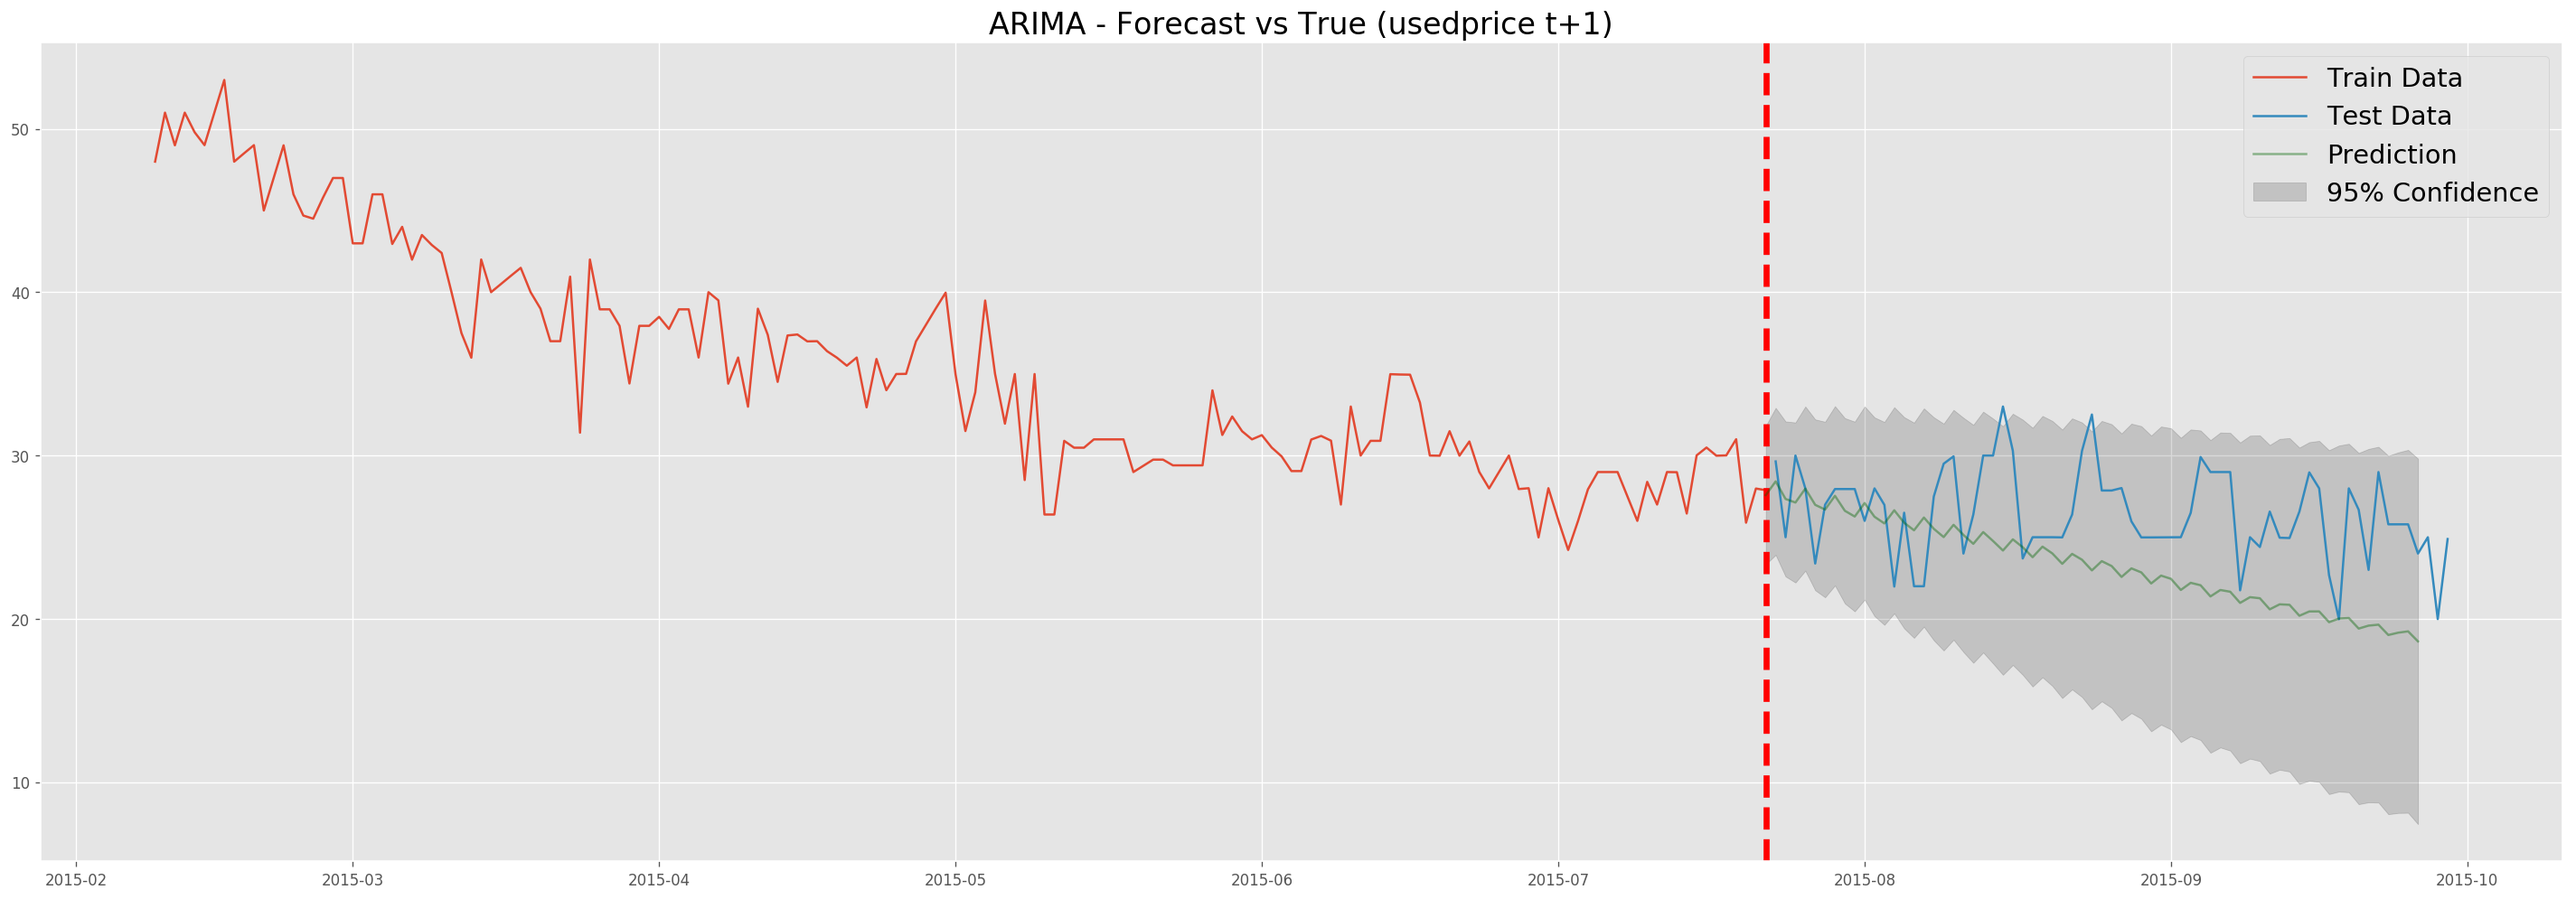

In [ ]:
# Forecast
n_periods = test.shape[0]
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot

with plt.style.context('ggplot'):
    with plt.rc_context({
        'figure.figsize': (30,10), 
        'legend.fontsize': 'xx-large', 
#          'xtick.color': 'white',
        }):

        plt.plot(train, label='Train Data')
        plt.plot(test, label='Test Data')
        plt.axvline(x=train.index[-1], linewidth=4, color='r', linestyle='--')
        plt.plot(fitted_series, color='darkgreen', alpha=0.4, label='Prediction')
        plt.fill_between(lower_series.index, 
                        lower_series, 
                        upper_series, 
                        color='k', alpha=.15, label='95% Confidence')

        plt.title("ARIMA - Forecast vs True (usedprice t+1)", size=20)
        plt.legend()
        plt.show()

In [ ]:
pred = smodel.predict(n_periods=test.shape[0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNet

import pmdarima as pm

import pandas as pd
import numpy as np

def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def AIC(true, pred, k):
    return len(true)*np.log(np.sum((true - pred)**2)/len(true)) + 2*k

def BIC(true, pred, k):
    return len(true)*np.log(np.sum((true - pred)**2)/len(true)) + k*np.log(len(true))

In [ ]:
mape = MAPE(test, pred)
mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))
r2 = r2_score(test, pred)
aic = AIC(test, pred, 3)
bic = BIC(test, pred, 3)
i = 'ARIMA'
metric_dict = {
    f'{i}_ID': 0,
    f'{i}_R2': r2,
    f'{i}_MAE': mae,
    f'{i}_RMSE': rmse,
    f'{i}_MAPE': mape,
    f'{i}_AIC': aic,
    f'{i}_BIC': bic,
}

NameError: ignored

In [ ]:
df = df_dele[0].copy()
df.head()

,newprice_t,usedprice_t,newstock_t,usedstock_t,sales_rank_t,sentiment_t,polarity_t,subjectivity_t,star_t,newprice_t-1,newprice_t+1,usedprice_t-1,usedprice_t+1,newstock_t-1,newstock_t+1,usedstock_t-1,usedstock_t+1
2015-02-09,52.00,50.00,14.0,8.0,23.0,-0.209958,-0.142484,0.273572,4.957941,56.3,55.00,49.40,47.99,12.0,16.0,8.0,11.0
2015-02-10,55.00,47.99,16.0,11.0,24.0,-0.209949,-0.142332,0.273653,4.957417,52.0,54.40,50.00,50.99,14.0,17.0,8.0,7.0
2015-02-11,54.40,50.99,17.0,7.0,22.0,-0.209827,-0.140501,0.274654,4.951306,55.0,54.40,47.99,48.99,16.0,16.0,11.0,11.0
2015-02-12,54.40,48.99,16.0,11.0,22.0,-0.209580,-0.137857,0.276163,4.942922,54.4,54.37,50.99,50.99,17.0,17.0,7.0,8.0
2015-02-13,54.37,50.99,17.0,8.0,27.0,-0.209547,-0.137559,0.276338,4.942000,54.4,54.37,48.99,49.79,16.0,17.0,11.0,12.0


In [ ]:
df_train = df.iloc[:160, :]
df_test = df.iloc[160:, :]

In [ ]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
sxmodel = pm.auto_arima(
    df_train['newprice_t+1'],
    exogenous=df_train.drop(columns='newprice_t+1'), 
    # start_p=1, start_q=1,
    # test='adf',
    # max_p=5, max_q=5,
    # start_P=0, 
    seasonal=False,
    trace=True,
    error_action='ignore',  
    suppress_warnings=True, 
    stepwise=True,
    )

sxmodel.summary()

Fit ARIMA: order=(2, 0, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0); AIC=694.738, BIC=750.091, Fit time=0.116 seconds
Fit ARIMA: order=(1, 0, 0); AIC=696.370, BIC=754.799, Fit time=5.129 seconds
Fit ARIMA: order=(0, 0, 1); AIC=696.727, BIC=755.156, Fit time=1.977 seconds
Fit ARIMA: order=(1, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 7.280 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  160
Model:                     ARMA(0, 0)   Log Likelihood                -329.369
Method:                           css   S.D. of innovations              1.896
Date:                Tue, 06 Aug 2019   AIC                            694.738
Time:                        15:57:00   BIC                            750.091
Sample:                             0   HQIC                           717.215
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.815e+04        nan        nan        nan         nan         nan
x1             0.3956      0.066      6.030      0.000       0.267       0.524
x2             0.0493      0.069      0.714      0.477      -0.086       0.185
x3             0.1745      0.064      2.725      0.007       0.049       0.300
x4             0.0384      0.063      0.610      0.543      -0.085       0.162
x5             0.0105      0.004      2.518      0.013       0.002       0.019
x6         -1.006e+05        nan        nan        nan         nan         nan
x7         -1.013e+05        nan        nan        nan         nan         nan
x8          1.505e+05        nan        nan        nan         nan         nan
x9         -7774.5625        nan        nan        nan         nan         nan
x10            0.0424      0.067      0.631      0.529      -0.089       0.174
x11            0.0087      0.073      0.119      0.905      -0.135       0.152
x12            0.1889      0.069      2.720      0.007       0.053       0.325
x13           -0.1070      0.058     -1.836      0.068      -0.221       0.007
x14           -0.1355      0.055     -2.476      0.014      -0.243      -0.028
x15            0.0124      0.052      0.239      0.812      -0.089       0.114
x16           -0.0075      0.053     -0.142      0.887      -0.111       0.096
==============================================================================
"""

In [ ]:
# Forecast
n_periods = df_test.shape[0]
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=df_test.drop(columns='newprice_t+1'), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)


# Plot

with plt.style.context('ggplot'):
    with plt.rc_context({
        'figure.figsize': (30,10), 
        'legend.fontsize': 'xx-large', 
#          'xtick.color': 'white',
        }):

        plt.plot(train, label='Train Data')
        plt.plot(test, label='Test Data')
        plt.axvline(x=train.index[-1], linewidth=4, color='r', linestyle='--')
        plt.plot(fitted_series, color='darkgreen', alpha=0.4, label='Prediction')
        plt.fill_between(lower_series.index, 
                        lower_series, 
                        upper_series, 
                        color='k', alpha=.15, label='95% Confidence')

        plt.title("ARIMA - Forecast vs True (usedprice t+1)", size=20)
        plt.legend()
        plt.show()

In [ ]:
def main_ARIMA():
    ENDO = ['newprice_t+1', 'usedprice_t+1', 'newstock_t+1', 'usedstock_t+1']
    all_metric = []
    
    for i in ENDO:
        metric_df_list = []
        for idx, df in enumerate(df_dele):
            data = df[i].copy()
            train, test = data[:160], data[160:]
            try:
                smodel = pm.auto_arima(
                    train, 
                    # start_p=1, start_q=1,
                    # test='adf',
                    # max_p=5, max_q=5,
                    # start_P=0, 
                    seasonal=False,
                    trace=False,
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=False,
                    n_jobs=-1)
            except:
                continue
            print("="*10, "RUNNING", idx, "="*10)
            pred = smodel.predict(n_periods=test.shape[0], return_conf_int=False)

            mape = MAPE(test, pred)
            try:
                mae = mean_absolute_error(test, pred)
            except:
                continue
            rmse = np.sqrt(mean_squared_error(test, pred))
            r2 = r2_score(test, pred)
            aic = AIC(test, pred, len(smodel.params()))
            bic = BIC(test, pred, len(smodel.params()))
            
            metric_dict = {
                f'{i}_ID': idx,
                f'{i}_R2': r2,
                f'{i}_MAE': mae,
                f'{i}_RMSE': rmse,
                f'{i}_MAPE': mape,
                f'{i}_AIC': aic,
                f'{i}_BIC': bic,
            }
            metric_df_list.append(pd.DataFrame(metric_dict, index=[idx]))
            print("="*10, "DONE", idx, "="*10)
        all_metric.append(pd.concat(metric_df_list).mean(axis=0))
        all_metric.append(pd.concat(metric_df_list).median(axis=0))
        
    # final_price, final_stock = summ(all_metric)
    
    return all_metric

In [ ]:
def rounder(dic):
    for key, val in dic.items():
        if type(val) == np.float64:
            dic[key] = round(val, ndigits=5)
    return dic

In [ ]:
all_metric_ARIMA = main_ARIMA()

========== RUNNING 0 ==========
========== DONE 0 ==========
========== RUNNING 1 ==========
========== DONE 1 ==========
========== RUNNING 2 ==========
========== DONE 2 ==========
========== RUNNING 3 ==========
========== DONE 3 ==========
========== RUNNING 4 ==========
========== DONE 4 ==========
========== RUNNING 5 ==========
========== DONE 5 ==========
========== RUNNING 6 ==========
========== DONE 6 ==========
========== RUNNING 7 ==========
========== DONE 7 ==========
========== RUNNING 8 ==========
========== DONE 8 ==========
========== RUNNING 9 ==========
========== DONE 9 ==========
========== RUNNING 10 ==========
========== DONE 10 ==========
========== RUNNING 11 ==========
========== DONE 11 ==========
========== RUNNING 12 ==========
========== DONE 12 ==========
========== RUNNING 13 ==========
========== DONE 13 ==========
========== RUNNING 14 ==========
========== DONE 14 ==========
========== RUNNING 15 ==========
========== DONE 15 ==========
========== R

In [ ]:
all_metric_ARIMA

[newprice_t+1_ID      2.169048e+01
 newprice_t+1_R2     -1.102527e+28
 newprice_t+1_MAE     3.270839e+00
 newprice_t+1_RMSE    3.729349e+00
 newprice_t+1_MAPE    1.937647e+01
 newprice_t+1_AIC     1.444895e+02
 newprice_t+1_BIC     1.601133e+02
 dtype: float64, newprice_t+1_ID       22.500000
 newprice_t+1_R2       -3.096429
 newprice_t+1_MAE       2.371298
 newprice_t+1_RMSE      3.105191
 newprice_t+1_MAPE     16.779703
 newprice_t+1_AIC     162.953177
 newprice_t+1_BIC     174.140378
 dtype: float64, usedprice_t+1_ID       21.500000
 usedprice_t+1_R2       -1.934513
 usedprice_t+1_MAE       2.433792
 usedprice_t+1_RMSE      2.891299
 usedprice_t+1_MAPE     20.928581
 usedprice_t+1_AIC     131.587562
 usedprice_t+1_BIC     145.890024
 dtype: float64, usedprice_t+1_ID       21.500000
 usedprice_t+1_R2       -1.176014
 usedprice_t+1_MAE       1.934034
 usedprice_t+1_RMSE      2.639685
 usedprice_t+1_MAPE     15.861321
 usedprice_t+1_AIC     128.182599
 usedprice_t+1_BIC     141.202353


In [ ]:
def summ(metric_lst):
    new_lst = []
    for i in metric_lst:
        name = i.index
        i.index = [n.replace('new', '') for n in name]
        name = i.index
        i.index = [n.replace('used', '') for n in name]
        new_lst.append(i)
    s1, s2, s3, s4, s5, s6, s7, s8 = (i for i in new_lst)

    return [(s1+s3)/2, (s2+s4)/2, (s5+s7)/2, (s6+s8)/2]

In [ ]:
summ(all_metric_ARIMA)

[price_t+1_ID      2.159524e+01
 price_t+1_R2     -5.512636e+27
 price_t+1_MAE     2.852316e+00
 price_t+1_RMSE    3.310324e+00
 price_t+1_MAPE    2.015252e+01
 price_t+1_AIC     1.380385e+02
 price_t+1_BIC     1.530017e+02
 dtype: float64, price_t+1_ID       22.000000
 price_t+1_R2       -2.136221
 price_t+1_MAE       2.152666
 price_t+1_RMSE      2.872438
 price_t+1_MAPE     16.320512
 price_t+1_AIC     145.567888
 price_t+1_BIC     157.671365
 dtype: float64, stock_t+1_ID       21.343023
 stock_t+1_R2       -6.634748
 stock_t+1_MAE      10.343096
 stock_t+1_RMSE     11.930880
 stock_t+1_MAPE     21.868986
 stock_t+1_AIC     309.145273
 stock_t+1_BIC     324.724318
 dtype: float64, stock_t+1_ID       21.250000
 stock_t+1_R2       -2.576193
 stock_t+1_MAE       8.330223
 stock_t+1_RMSE      9.749732
 stock_t+1_MAPE     14.467927
 stock_t+1_AIC     311.609442
 stock_t+1_BIC     325.317924
 dtype: float64]

## Model: STS

In [ ]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pylab as plt
import matplotlib.dates as mdates
import seaborn as sns

import collections

import pickle

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp

from tensorflow_probability import distributions as tfd
from tensorflow_probability import sts


sns.set_context("notebook", font_scale=1.0)
sns.set_style("whitegrid")
%config InlineBackend.figure_format = 'retina'


def plot_forecast(
    x,
    y,
    forecast_mean,
    forecast_scale,
    forecast_samples,
    title,
    x_locator=None,
    x_formatter=None,
):
    """Plot a forecast distribution against the 'true' time series."""
    colors = sns.color_palette()
    c1, c2 = colors[0], colors[1]
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 1, 1)

    num_steps = len(y)
    num_steps_forecast = forecast_mean.shape[-1]
    num_steps_train = num_steps - num_steps_forecast

    ax.plot(x, y, lw=2, color=c1, label="ground truth")

    forecast_steps = np.arange(
        x[num_steps_train], x[num_steps_train] + num_steps_forecast, dtype=x.dtype
    )

    ax.plot(forecast_steps, forecast_samples.T, lw=1, color=c2, alpha=0.1)

    ax.plot(forecast_steps, forecast_mean, lw=2, ls="--", color=c2, label="forecast")
    ax.fill_between(
        forecast_steps,
        forecast_mean - 2 * forecast_scale,
        forecast_mean + 2 * forecast_scale,
        color=c2,
        alpha=0.2,
    )

    ymin, ymax = (
        min(np.min(forecast_samples), np.min(y)),
        max(np.max(forecast_samples), np.max(y)),
    )
    yrange = ymax - ymin
    ax.set_ylim([ymin - yrange * 0.1, ymax + yrange * 0.1])
    ax.set_title("{}".format(title))
    ax.legend()

    if x_locator is not None:
        ax.xaxis.set_major_locator(x_locator)
        ax.xaxis.set_major_formatter(x_formatter)
        fig.autofmt_xdate()

    return fig, ax


def plot_components(
    dates,
    component_means_dict,
    component_stddevs_dict,
    x_locator=None,
    x_formatter=None,
):
    """Plot the contributions of posterior components in a single figure."""
    colors = sns.color_palette()
    c1, c2 = colors[0], colors[1]

    axes_dict = collections.OrderedDict()
    num_components = len(component_means_dict)
    fig = plt.figure(figsize=(12, 2.5 * num_components))
    for i, component_name in enumerate(component_means_dict.keys()):
        component_mean = component_means_dict[component_name]
        component_stddev = component_stddevs_dict[component_name]

        ax = fig.add_subplot(num_components, 1, 1 + i)
        ax.plot(dates, component_mean, lw=2)
        ax.fill_between(
            dates,
            component_mean - 2 * component_stddev,
            component_mean + 2 * component_stddev,
            color=c2,
            alpha=0.5,
        )
        ax.set_title(component_name)
        if x_locator is not None:
            ax.xaxis.set_major_locator(x_locator)
            ax.xaxis.set_major_formatter(x_formatter)
        axes_dict[component_name] = ax
    fig.autofmt_xdate()
    fig.tight_layout()
    return fig, axes_dict


In [ ]:
import matplotlib as mpl
from matplotlib import pylab as plt
import matplotlib.dates as mdates
import seaborn as sns

import collections

import pickle

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp

from tensorflow_probability import distributions as tfd
from tensorflow_probability import sts

W0807 23:13:06.780057 140245013825408 __init__.py:687] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [ ]:
import pickle

with open('final_final_final.pkl', 'rb') as file:
    df_lst = pickle.load(file)

In [ ]:
import pprint

pprint.pprint(df[0].columns.values.tolist())

['newprice_t',
 'usedprice_t',
 'newstock_t',
 'usedstock_t',
 'sales_rank_t',
 'sentiment_t',
 'polarity_t',
 'subjectivity_t',
 'star_t',
 'newprice_t-1',
 'newprice_t+1',
 'usedprice_t-1',
 'usedprice_t+1',
 'newstock_t-1',
 'newstock_t+1',
 'usedstock_t-1',
 'usedstock_t+1']


In [ ]:
def build_model_advanced(y_train):
    trend_effect = sts.LocalLinearTrend(
        observed_time_series=y_train, name="trend_effect"
    )

    day_of_week_effect = sts.Seasonal(
        num_seasons=7,
        num_steps_per_season=1,
        observed_time_series=y_train,
        name="day_of_week_effect",
    )

    # exogenous_effects = sts.LinearRegression(
    #     design_matrix=X_train.loc[:, [
    #                                   'sales_rank_t', 
    #                                   'sentiment_t',
    #                                   'polarity_t',
    #                                   'subjectivity_t',
    #                                   'star_t',
    #                                 'usedprice_t',
    #                                 'newstock_t',
    #                                 'usedstock_t',
    #     ]],
    #     name="exogenous_effects",
    # )

    autoregressive = sts.Autoregressive(
            order=1, observed_time_series=y_train, name="autoregressive"
        )

    model = sts.Sum(
        [
         trend_effect,
         day_of_week_effect,
        #  exogenous_effects,
         autoregressive,
        ],
        observed_time_series=y_train,
    )
    
    return model

In [ ]:
def mod_STS(y_train, num_forecast_steps):
    tf.reset_default_graph()
    target_model_adv = build_model_advanced(y_train)

    # Build the variational loss function and surrogate posteriors `qs`.
    with tf.variable_scope("sts_elbo", reuse=tf.AUTO_REUSE):
        elbo_loss, variational_posteriors = tfp.sts.build_factored_variational_loss(
            target_model_adv, y_train
        )
    train_vi = tf.train.AdamOptimizer(0.1).minimize(elbo_loss)

    # Run the optimization and draw samples from the surrogate posteriors.

    # Allow external control of optimization to reduce test runtimes.
    num_variational_steps = 200  # param { isTemplate: true}
    num_variational_steps = int(num_variational_steps)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer()) 

        for i in range(num_variational_steps):
            _, elbo_ = sess.run((train_vi, elbo_loss))
        if i % 20 == 0:
            print("step {} -ELBO {}".format(i, elbo_))
        q_samples_target_ = sess.run(
            {k: q.sample(50) for k, q in variational_posteriors.items()}
        )
        
    target_forecast_dist = tfp.sts.forecast(
        model=target_model_adv,
        observed_time_series=y_train,
        parameter_samples=q_samples_target_,
        num_steps_forecast=num_forecast_steps,
    )

    num_samples = 10

    with tf.Session() as sess:
        (
            target_forecast_mean,
            target_forecast_scale,
            target_forecast_samples,
        ) = sess.run(
            (
                target_forecast_dist.mean()[..., 0],
                target_forecast_dist.stddev()[..., 0],
                target_forecast_dist.sample(num_samples)[..., 0],
            )
        )

    return target_forecast_mean



In [ ]:
mod_STS(dele_y_train, len(dele_y_test))

array([18.78363768, 19.85749943, 21.46606651, 21.70183532, 21.43148728,
       21.96531282, 21.08629406, 21.6285077 , 21.30465923, 21.98633383,
       21.59586321, 20.89550079, 21.12968254, 20.03898093, 20.42969246,
       19.99605739, 20.59722419, 20.14704415, 19.40191913, 19.60220104,
       18.48557986, 18.85629544, 18.40710509, 18.9960769 , 18.53626731,
       17.78348779, 17.97764768, 16.85610236, 17.22283661, 16.77041169,
       17.35674401, 16.89477172, 16.1402135 , 16.33290546, 15.21014481,
       15.5758699 , 15.12260475, 15.70823571, 15.24567665, 14.49062646,
       14.68290512, 13.55979662, 13.92522845, 13.47171567, 14.05713723,
       13.59440085, 12.83920032, 13.03135137, 11.90813444, 12.27347402,
       11.8198827 , 12.40523733, 11.94244387, 11.18719462, 11.37930406,
       10.25605156, 10.62136072, 10.16774337, 10.75307573, 10.29026317,
        9.53499757,  9.72709297,  8.60382844,  8.96912728,  8.51550107,
        9.10082582,  8.63800673,  7.88273551])

In [ ]:
# dele_data = df[5].copy()
# dele_train, dele_test = dele_data[:160], dele_data[160:]
# dele_y_train, dele_y_test = dele_train['newprice_t+1'], dele_test['newprice_t+1']
# time_index = (
#     pd.concat([dele_y_train, dele_y_test])
#     .index.strftime("%Y-%m-%d")
#     .values.astype(np.datetime64)
# )
# dele = pd.concat([dele_y_train, dele_y_test]).values
# num_forecast_steps = dele_y_test.shape[0]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNet

import numpy as np

def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def AIC(true, pred, k):
    return len(true)*np.log(np.sum((true - pred)**2)/len(true)) + 2*k

def BIC(true, pred, k):
    return len(true)*np.log(np.sum((true - pred)**2)/len(true)) + k*np.log(len(true))


def main_STS():
    ENDO = ['newprice_t+1', 'usedprice_t+1', 'newstock_t+1', 'usedstock_t+1']
    all_metric = []
    
    for i in ENDO:
        metric_df_list = []
        for idx, df in enumerate(df_lst):
            data = df[i].copy()
            train, test = data[:161], data[160:]
            print("="*10, "RUNNING", idx, "="*10)
            pred = mod_STS(train, len(test))

            mape = MAPE(test, pred)
            mae = mean_absolute_error(test, pred)
            rmse = np.sqrt(mean_squared_error(test, pred))
            r2 = r2_score(test, pred)
            # aic = AIC(test, pred, len(smodel.params()))
            # bic = BIC(test, pred, len(smodel.params()))
            
            metric_dict = {
                f'{i}_ID': idx,
                f'{i}_R2': r2,
                f'{i}_MAE': mae,
                f'{i}_RMSE': rmse,
                f'{i}_MAPE': mape,
                # f'{i}_AIC': aic,
                # f'{i}_BIC': bic,
            }
            metric_df_list.append(pd.DataFrame(metric_dict, index=[idx]))
            print("="*10, "DONE", idx, "="*10)
        all_metric.append(pd.concat(metric_df_list).mean(axis=0))
        all_metric.append(pd.concat(metric_df_list).median(axis=0))
        
    # final_price, final_stock = summ(all_metric)
    
    return all_metric

In [ ]:
def summ(metric_lst):
    new_lst = []
    for i in metric_lst:
        name = i.index
        i.index = [n.replace('new', '') for n in name]
        name = i.index
        i.index = [n.replace('used', '') for n in name]
        new_lst.append(i)
    s1, s2, s3, s4, s5, s6, s7, s8 = (i for i in new_lst)

    return [(s1+s3)/2, (s2+s4)/2, (s5+s7)/2, (s6+s8)/2]
   

In [ ]:
from copy import copy
metric_copy  = copy(final_metric)

In [ ]:
final_metric

[price_t+1_ID      2.150000e+01
 price_t+1_R2     -3.952184e+26
 price_t+1_MAE     3.865504e+00
 price_t+1_RMSE    4.453647e+00
 price_t+1_MAPE    2.217543e+01
 dtype: float64, price_t+1_ID      21.500000
 price_t+1_R2      -4.042916
 price_t+1_MAE      2.998905
 price_t+1_RMSE     3.547094
 price_t+1_MAPE    19.809652
 dtype: float64, price_t+1_ID      21.500000
 price_t+1_R2      -3.284687
 price_t+1_MAE      2.653708
 price_t+1_RMSE     3.122924
 price_t+1_MAPE    23.375766
 dtype: float64, price_t+1_ID      21.500000
 price_t+1_R2      -1.139310
 price_t+1_MAE      2.436886
 price_t+1_RMSE     2.972000
 price_t+1_MAPE    18.644830
 dtype: float64, stock_t+1_ID      21.500000
 stock_t+1_R2     -52.967739
 stock_t+1_MAE     23.273798
 stock_t+1_RMSE    26.654760
 stock_t+1_MAPE    31.800521
 dtype: float64, stock_t+1_ID      21.500000
 stock_t+1_R2      -5.472703
 stock_t+1_MAE     12.487755
 stock_t+1_RMSE    13.772744
 stock_t+1_MAPE    20.141612
 dtype: float64, stock_t+1_ID      

In [ ]:
summ(metric_copy)

[price_t+1_ID      2.150000e+01
 price_t+1_R2     -1.976092e+26
 price_t+1_MAE     3.259606e+00
 price_t+1_RMSE    3.788286e+00
 price_t+1_MAPE    2.277560e+01
 dtype: float64, price_t+1_ID      21.500000
 price_t+1_R2      -2.591113
 price_t+1_MAE      2.717895
 price_t+1_RMSE     3.259547
 price_t+1_MAPE    19.227241
 dtype: float64, stock_t+1_ID      21.500000
 stock_t+1_R2     -29.365628
 stock_t+1_MAE     15.349013
 stock_t+1_RMSE    17.694828
 stock_t+1_MAPE    27.443136
 dtype: float64, stock_t+1_ID      21.500000
 stock_t+1_R2      -3.413429
 stock_t+1_MAE      8.822934
 stock_t+1_RMSE     9.958322
 stock_t+1_MAPE    17.172420
 dtype: float64]

In [ ]:
dele_metric[0], dele_metric[1], dele_metric[2]

(newprice_t+1_ID       1.000000
 newprice_t+1_R2     -88.695527
 newprice_t+1_MAE     13.447876
 newprice_t+1_RMSE    15.418802
 newprice_t+1_MAPE    52.469081
 dtype: float64, newprice_t+1_ID       0.500000
 newprice_t+1_R2     -44.347764
 newprice_t+1_MAE      6.723938
 newprice_t+1_RMSE     7.709401
 newprice_t+1_MAPE    26.234540
 dtype: float64, usedprice_t+1_ID       1.000000
 usedprice_t+1_R2      -3.671034
 usedprice_t+1_MAE      6.625559
 usedprice_t+1_RMSE     8.148501
 usedprice_t+1_MAPE    34.287463
 dtype: float64)

In [ ]:
from google.colab import drive

drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
final_metric = main_STS()


========== RUNNING 0 ==========
========== DONE 0 ==========
========== RUNNING 1 ==========
========== DONE 1 ==========
========== RUNNING 2 ==========
========== DONE 2 ==========
========== RUNNING 3 ==========
========== DONE 3 ==========
========== RUNNING 4 ==========
========== DONE 4 ==========
========== RUNNING 5 ==========
========== DONE 5 ==========
========== RUNNING 6 ==========
========== DONE 6 ==========
========== RUNNING 7 ==========
========== DONE 7 ==========
========== RUNNING 8 ==========
========== DONE 8 ==========
========== RUNNING 9 ==========
========== DONE 9 ==========
========== RUNNING 10 ==========
========== DONE 10 ==========
========== RUNNING 11 ==========
========== DONE 11 ==========
========== RUNNING 12 ==========
========== DONE 12 ==========
========== RUNNING 13 ==========
========== DONE 13 ==========
========== RUNNING 14 ==========
========== DONE 14 ==========
========== RUNNING 15 ==========
========== DONE 15 ==========
========== R

In [ ]:
final_metric

[newprice_t+1_ID      2.150000e+01
 newprice_t+1_R2     -3.952184e+26
 newprice_t+1_MAE     3.865504e+00
 newprice_t+1_RMSE    4.453647e+00
 newprice_t+1_MAPE    2.217543e+01
 dtype: float64, newprice_t+1_ID      21.500000
 newprice_t+1_R2      -4.042916
 newprice_t+1_MAE      2.998905
 newprice_t+1_RMSE     3.547094
 newprice_t+1_MAPE    19.809652
 dtype: float64, usedprice_t+1_ID      21.500000
 usedprice_t+1_R2      -3.284687
 usedprice_t+1_MAE      2.653708
 usedprice_t+1_RMSE     3.122924
 usedprice_t+1_MAPE    23.375766
 dtype: float64, usedprice_t+1_ID      21.500000
 usedprice_t+1_R2      -1.139310
 usedprice_t+1_MAE      2.436886
 usedprice_t+1_RMSE     2.972000
 usedprice_t+1_MAPE    18.644830
 dtype: float64, newstock_t+1_ID      21.500000
 newstock_t+1_R2     -52.967739
 newstock_t+1_MAE     23.273798
 newstock_t+1_RMSE    26.654760
 newstock_t+1_MAPE    31.800521
 dtype: float64, newstock_t+1_ID      21.500000
 newstock_t+1_R2      -5.472703
 newstock_t+1_MAE     12.487755

## Model: LSTM

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install tensorflow-gpu==2.0.0-beta1
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
import pickle
with open('final_final_final.pkl', 'rb') as F:
    dfdf = pickle.load(F)

In [ ]:
dfdf[0].head()

,newprice_t,usedprice_t,newstock_t,usedstock_t,sales_rank_t,sentiment_t,polarity_t,subjectivity_t,star_t,newprice_t-1,newprice_t+1,usedprice_t-1,usedprice_t+1,newstock_t-1,newstock_t+1,usedstock_t-1,usedstock_t+1
2015-02-09,52.00,50.00,14.0,8.0,23.0,-0.209958,-0.142484,0.273572,4.957941,56.3,55.00,49.40,47.99,12.0,16.0,8.0,11.0
2015-02-10,55.00,47.99,16.0,11.0,24.0,-0.209949,-0.142332,0.273653,4.957417,52.0,54.40,50.00,50.99,14.0,17.0,8.0,7.0
2015-02-11,54.40,50.99,17.0,7.0,22.0,-0.209827,-0.140501,0.274654,4.951306,55.0,54.40,47.99,48.99,16.0,16.0,11.0,11.0
2015-02-12,54.40,48.99,16.0,11.0,22.0,-0.209580,-0.137857,0.276163,4.942922,54.4,54.37,50.99,50.99,17.0,17.0,7.0,8.0
2015-02-13,54.37,50.99,17.0,8.0,27.0,-0.209547,-0.137559,0.276338,4.942000,54.4,54.37,48.99,49.79,16.0,17.0,11.0,12.0


In [ ]:
features_considered = dfdf[0].columns[:9].tolist()
features_considered

['newprice_t',
 'usedprice_t',
 'newstock_t',
 'usedstock_t',
 'sales_rank_t',
 'sentiment_t',
 'polarity_t',
 'subjectivity_t',
 'star_t']

In [ ]:
features = dfdf[0][features_considered]
features.index = dfdf[0].index
features.head()

,newprice_t,usedprice_t,newstock_t,usedstock_t,sales_rank_t,sentiment_t,polarity_t,subjectivity_t,star_t,newprice_t+1
2015-02-09,52.00,50.00,14.0,8.0,23.0,-0.209958,-0.142484,0.273572,4.957941,55.00
2015-02-10,55.00,47.99,16.0,11.0,24.0,-0.209949,-0.142332,0.273653,4.957417,54.40
2015-02-11,54.40,50.99,17.0,7.0,22.0,-0.209827,-0.140501,0.274654,4.951306,54.40
2015-02-12,54.40,48.99,16.0,11.0,22.0,-0.209580,-0.137857,0.276163,4.942922,54.37
2015-02-13,54.37,50.99,17.0,8.0,27.0,-0.209547,-0.137559,0.276338,4.942000,54.37


In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
def model_nn(df, i):
    features = df.columns[:9].tolist()
    features.append(i)
    data = df[features]
    data.index = df.index
    data = data.values

    X_train, y_train = multivariate_data(data[:, :-1], data[:, -1], 0, 160, 7, 0, 1, single_step=True)
    print(X_train.shape, y_train.shape)
    X_test, y_test = multivariate_data(data[:, :-1], data[:, -1], 160, None, 7, 0, 1, single_step=True)
    print(X_test.shape, y_test.shape)
    

    single_step_model = tf.keras.models.Sequential([
                                                    # tf.keras.layers.Bidirectional(
                                                    #     tf.keras.layers.LSTM(50, return_sequences=True), input_shape=X_train.shape[-2:]
                                                    # ),
                                                    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=X_train.shape[-2:]),
                                                    tf.keras.layers.Dropout(0.2),
                                                    # tf.keras.layers.Bidirectional(
                                                    #     tf.keras.layers.LSTM(25)
                                                    # ),
                                                    tf.keras.layers.LSTM(32, return_sequences=True),
                                                    tf.keras.layers.Dropout(0.2),
                                                    tf.keras.layers.LSTM(16),
                                                    tf.keras.layers.Dropout(0.2),
                                                    tf.keras.layers.Dense(1),
                                                    ]) 
    # single_step_model = tf.keras.models.Sequential()
    # single_step_model.add(tf.keras.layers.LSTM(32,
    #                                         input_shape=X_train.shape[-2:]))
    # single_step_model.add(tf.keras.layers.Dense(1))

    single_step_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse')

    EPOCHS = 30
    EVALUATION_INTERVAL = int(len(X_train)/1)

    single_step_history = single_step_model.fit(X_train, y_train, epochs=EPOCHS,
                                                steps_per_epoch=EVALUATION_INTERVAL,
                                                validation_split=0.2,
                                                validation_steps=EVALUATION_INTERVAL,
                                                # verbose=0,
                                                )
    plot_train_history(single_step_history, "TITLE")

    y_pred = [single_step_model.predict(X_test[i].reshape(1, X_test.shape[-2], X_test.shape[-1])) for i in range(X_test.shape[0])]
    y_pred = np.array(y_pred).reshape(len(y_pred),)
    return y_test, y_pred

In [ ]:
tmptest, tmppred = model_nn(dfdf[0], i='newprice_t+1')

(153, 7, 9) (153,)
(60, 7, 9) (60,)


In [ ]:
tmptest.shape, tmppred.shape

((60,), (60,))

In [ ]:
tmp_features = dfdf[0].columns[:9].tolist()
tmp_features.append('newprice_t+1')
tmp_data = dfdf[0][tmp_features]
tmp_data.index = dfdf[0].index
tmp_data  = tmp_data.values


tmpX, tmpY = multivariate_data(tmp_data[:, :-1], tmp_data[:, -1], 0, 160, 3, 0, 1, single_step=True)
tmpX.shape, tmpY.shape

((157, 3, 9), (157,))

In [ ]:
tmpX, tmpY = multivariate_data(dataset[:, :-1], dataset[:, -1], 0, 160, 7, 0, 1, single_step=True)
tmpX.shape, tmpY.shape


((153, 7, 9), (153,))

In [ ]:

tmpX_test, tmpY_test = multivariate_data(dataset[:, :-1], dataset[:, -1], 160, None, 7, 0, 1, single_step=True)
tmpX_test.shape, tmpY_test.shape

((60, 7, 9), (60,))

In [ ]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=tmpX.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [ ]:
from keras.utils import plot_model, print_summary
print_summary(single_step_model, line_length=None, positions=None, print_fn=None)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 5,409
Trainable params: 5,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
single_step_model.predict(tmpX_test[0].reshape(1, 7, 10))

array([[-0.47017005]], dtype=float32)

In [ ]:
EPOCHS = 10
EVALUATION_INTERVAL = 20

single_step_history = single_step_model.fit(tmpX, tmpY, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            # validation_data=,
                                            validation_split=0.2,
                                            validation_steps=20)

Train on 20 samples, validate on 31 samples
Epoch 1/10
20/20 [==============================] - 1s 25ms/step - loss: 0.3622 - val_loss: 0.2922
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.2350 - val_loss: 0.3004
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.2016 - val_loss: 0.2717
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 0.1929 - val_loss: 0.2363
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1865 - val_loss: 0.2202
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1814 - val_loss: 0.2360
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 0.1766 - val_loss: 0.2685
Epoch 8/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1718 - val_loss: 0.3072
Epoch 9/10
20/20 [==============================] - 0s 6ms/step - loss: 0.1675 - val_loss: 0.3349
Epoch 10/10
20/20 [==============================] - 0s 5ms/step - loss: 

In [ ]:
single_step_model.predict(tmpX_test[0].reshape((1, 7, 9)))

array([[-0.4047987]], dtype=float32)

In [ ]:
df_lst = dfdf

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNet

import numpy as np

def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def AIC(true, pred, k):
    return len(true)*np.log(np.sum((true - pred)**2)/len(true)) + 2*k

def BIC(true, pred, k):
    return len(true)*np.log(np.sum((true - pred)**2)/len(true)) + k*np.log(len(true))


def main_NN():
    ENDO = ['newprice_t+1', 'usedprice_t+1', 'newstock_t+1', 'usedstock_t+1']
    all_metric = []
    
    for i in ENDO:
        metric_df_list = []
        for idx, df in enumerate(df_lst):
            test, pred = model_nn(df, i)
            print("="*10, "RUNNING", idx, "="*10)

            mape = MAPE(test, pred)
            mae = mean_absolute_error(test, pred)
            rmse = np.sqrt(mean_squared_error(test, pred))
            r2 = r2_score(test, pred)
            aic = AIC(test, pred, df.shape[0]-1)
            bic = BIC(test, pred, df.shape[0]-1) 
            
            metric_dict = {
                f'{i}_ID': idx,
                f'{i}_R2': r2,
                f'{i}_MAE': mae,
                f'{i}_RMSE': rmse,
                f'{i}_MAPE': mape,
                f'{i}_AIC': aic,
                f'{i}_BIC': bic,
            }
            metric_df_list.append(pd.DataFrame(metric_dict, index=[idx]))
            print("="*10, "DONE", idx, "="*10)
        all_metric.append(pd.concat(metric_df_list).mean(axis=0))
        all_metric.append(pd.concat(metric_df_list).median(axis=0))
        
    # final_price, final_stock = summ(all_metric)
    
    return all_metric

In [ ]:
nn_metric = main_NN()

(153, 7, 9) (153,)
(60, 7, 9) (60,)
========== RUNNING 0 ==========
========== DONE 0 ==========
(153, 7, 9) (153,)
(61, 7, 9) (61,)
========== RUNNING 1 ==========
========== DONE 1 ==========
(153, 7, 9) (153,)
(62, 7, 9) (62,)
========== RUNNING 2 ==========
========== DONE 2 ==========
(153, 7, 9) (153,)
(43, 7, 9) (43,)
========== RUNNING 3 ==========
========== DONE 3 ==========
(153, 7, 9) (153,)
(60, 7, 9) (60,)
========== RUNNING 4 ==========
========== DONE 4 ==========
(153, 7, 9) (153,)
(61, 7, 9) (61,)
========== RUNNING 5 ==========
========== DONE 5 ==========
(153, 7, 9) (153,)
(61, 7, 9) (61,)
========== RUNNING 6 ==========
========== DONE 6 ==========
(153, 7, 9) (153,)
(30, 7, 9) (30,)
========== RUNNING 7 ==========
========== DONE 7 ==========
(153, 7, 9) (153,)
(61, 7, 9) (61,)
========== RUNNING 8 ==========
========== DONE 8 ==========
(153, 7, 9) (153,)
(61, 7, 9) (61,)
========== RUNNING 9 ==========
========== DONE 9 ==========
(153, 7, 9) (153,)
(60, 7, 9) 

In [ ]:
nn_metric

[newprice_t+1_ID      2.150000e+01
 newprice_t+1_R2     -3.437308e+28
 newprice_t+1_MAE     2.881654e+00
 newprice_t+1_RMSE    3.327130e+00
 newprice_t+1_MAPE    1.725476e+01
 newprice_t+1_AIC     5.582987e+02
 newprice_t+1_BIC     1.023301e+03
 dtype: float64, newprice_t+1_ID        21.500000
 newprice_t+1_R2        -2.395372
 newprice_t+1_MAE        2.025101
 newprice_t+1_RMSE       2.774863
 newprice_t+1_MAPE      14.731836
 newprice_t+1_AIC      570.819438
 newprice_t+1_BIC     1040.910769
 dtype: float64, usedprice_t+1_ID        21.500000
 usedprice_t+1_R2        -5.550059
 usedprice_t+1_MAE        3.140153
 usedprice_t+1_RMSE       3.584519
 usedprice_t+1_MAPE      27.628013
 usedprice_t+1_AIC      571.670970
 usedprice_t+1_BIC     1036.672836
 dtype: float64, usedprice_t+1_ID        21.500000
 usedprice_t+1_R2        -1.364980
 usedprice_t+1_MAE        2.423728
 usedprice_t+1_RMSE       2.860564
 usedprice_t+1_MAPE      20.930945
 usedprice_t+1_AIC      572.441700
 usedprice_t+1

In [ ]:
def summ(metric_lst):
    new_lst = []
    for i in metric_lst:
        name = i.index
        i.index = [n.replace('new', '') for n in name]
        name = i.index
        i.index = [n.replace('used', '') for n in name]
        new_lst.append(i)
    s1, s2, s3, s4, s5, s6, s7, s8 = (i for i in new_lst)

    return [(s1+s3)/2, (s2+s4)/2, (s5+s7)/2, (s6+s8)/2]
  

In [ ]:
from copy import copy
tmp_metric = copy(nn_metric)

In [ ]:
summ(tmp_metric)

[price_t+1_ID      2.150000e+01
 price_t+1_R2     -1.718654e+28
 price_t+1_MAE     3.010904e+00
 price_t+1_RMSE    3.455824e+00
 price_t+1_MAPE    2.244139e+01
 price_t+1_AIC     5.649848e+02
 price_t+1_BIC     1.029987e+03
 dtype: float64, price_t+1_ID        21.500000
 price_t+1_R2        -1.880176
 price_t+1_MAE        2.224414
 price_t+1_RMSE       2.817714
 price_t+1_MAPE      17.831391
 price_t+1_AIC      571.630569
 price_t+1_BIC     1043.337170
 dtype: float64, stock_t+1_ID        21.500000
 stock_t+1_R2       -29.313230
 stock_t+1_MAE       17.334704
 stock_t+1_RMSE      18.361291
 stock_t+1_MAPE      23.957583
 stock_t+1_AIC      735.844757
 stock_t+1_BIC     1200.846623
 dtype: float64, stock_t+1_ID        21.500000
 stock_t+1_R2        -4.175603
 stock_t+1_MAE        9.168973
 stock_t+1_RMSE      10.627391
 stock_t+1_MAPE      18.620556
 stock_t+1_AIC      724.304469
 stock_t+1_BIC     1203.305096
 dtype: float64]